In [587]:
import numpy as np
from scipy.interpolate import InterpolatedUnivariateSpline
from scipy.integrate import quad
import matplotlib.pyplot as plt
from astropy.io import fits
import os


# Read in AGN table:
path = '/Users/bbonine/ou/research/corr_func/data/'
# Remote version: cat = "/home/bonine/donnajean/research/agn_corr/data/agntable_total.txt"
cat = path + 'agntable_total.txt'
field = np.loadtxt(cat, dtype = str,delimiter = None, skiprows = 1, usecols=(15) , unpack = True)
x,y = np.loadtxt(cat, delimiter = None, skiprows = 1, usecols=(16,17) , unpack = True)


# Read in the flux limit file: 
#lim = '/home/bonine/donnajean/research/agn_corr/data/fluxlimit.txt'
lim = path + 'fluxlimit.txt'
exp, fluxlim = np.loadtxt(lim,skiprows = 1, unpack = True)
exp = np.power(10,exp) #exposure time in log units; convert

# Interpolate the flux values:
func1 = InterpolatedUnivariateSpline(exp,fluxlim) 
xnew = np.linspace(0,10**8, num = 10**7, endpoint = True)
''' Get rid of any duplicates:
#field_list = np.unique(field)
# Select desired AGN in desired field: grb060526, in this case
here = np.where(field == 'grb060124')
x_new = x[here]
y_new = y[here]'''
#index = np.zeros(len(field_list))

#Get rid of any duplicates:
field_list = np.unique(field)

# Create output folder


In [158]:
exp,fluxlim

(array([1.00000000e+01, 1.51356125e+01, 2.29086765e+01, 3.46736850e+01,
        5.24807460e+01, 7.94328235e+01, 1.20226443e+02, 1.81970086e+02,
        2.69153480e+02, 4.07380278e+02, 6.16595002e+02, 9.33254301e+02,
        1.41253754e+03, 2.13796209e+03, 3.23593657e+03, 4.89778819e+03,
        7.41310241e+03, 1.12201845e+04, 1.69824365e+04, 2.57039578e+04,
        3.89045145e+04, 5.88843655e+04, 8.70963590e+04, 1.31825674e+05,
        1.99526231e+05, 3.01995172e+05, 4.57088190e+05, 6.91830971e+05,
        1.04712855e+06, 1.58489319e+06]),
 array([3.3163e-12, 2.3160e-12, 1.6391e-12, 1.1603e-12, 8.2137e-13,
        5.8955e-13, 4.1805e-13, 3.0372e-13, 2.2222e-13, 1.6177e-13,
        1.1888e-13, 8.7717e-14, 6.4725e-14, 4.8425e-14, 3.6229e-14,
        2.7483e-14, 2.0848e-14, 1.6035e-14, 1.2505e-14, 9.6180e-15,
        7.6051e-15, 5.9308e-15, 4.7621e-15, 3.7654e-15, 3.0188e-15,
        2.3870e-15, 1.9137e-15, 1.5393e-15, 1.2472e-15, 9.9989e-16]))

In [591]:
## Matplotlib stuff
fontsize = 8
figsize = (5,4)
dpi = 300

# Configure parameters
plt.rcParams.update({'font.size': fontsize, 'figure.figsize': figsize, 'figure.dpi': dpi})

# Default tick label size
plt.style.use('default')
plt.rcParams['text.usetex'] = True
plt.rcParams['xtick.labelsize'] = fontsize
plt.rcParams['ytick.labelsize'] = fontsize
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 4
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1

plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['axes.linewidth'] = 1

In [589]:

#Begin looping through fields

# Swift Params
pixel_angle_sec = (47.1262 / 20)**2 # [square arcseconds]
pixel_angle_deg = (pixel_angle_sec / 3600**2)
pix_scale = 47.1262 / 20 # arcseconds / pixel

# From Dai et al 2015::
a = 1.34
b = 2.37 # +/- 0.01
f_b = 3.67 * 10 ** (-15) # erg  cm^-2 s^-1
k = 531.91*10**14 # +/- 250.04; (deg^-2 (erg cm^-2 s^-1)^-1)
s_ref = 10**-14 # erg cm^-2 s^-1

def dn_1(s):
    return k*(s/s_ref)**(-a)

def dn_2(s):
    return k*((f_b/s_ref)**(b-a)) * ((s/s_ref)**(-b))

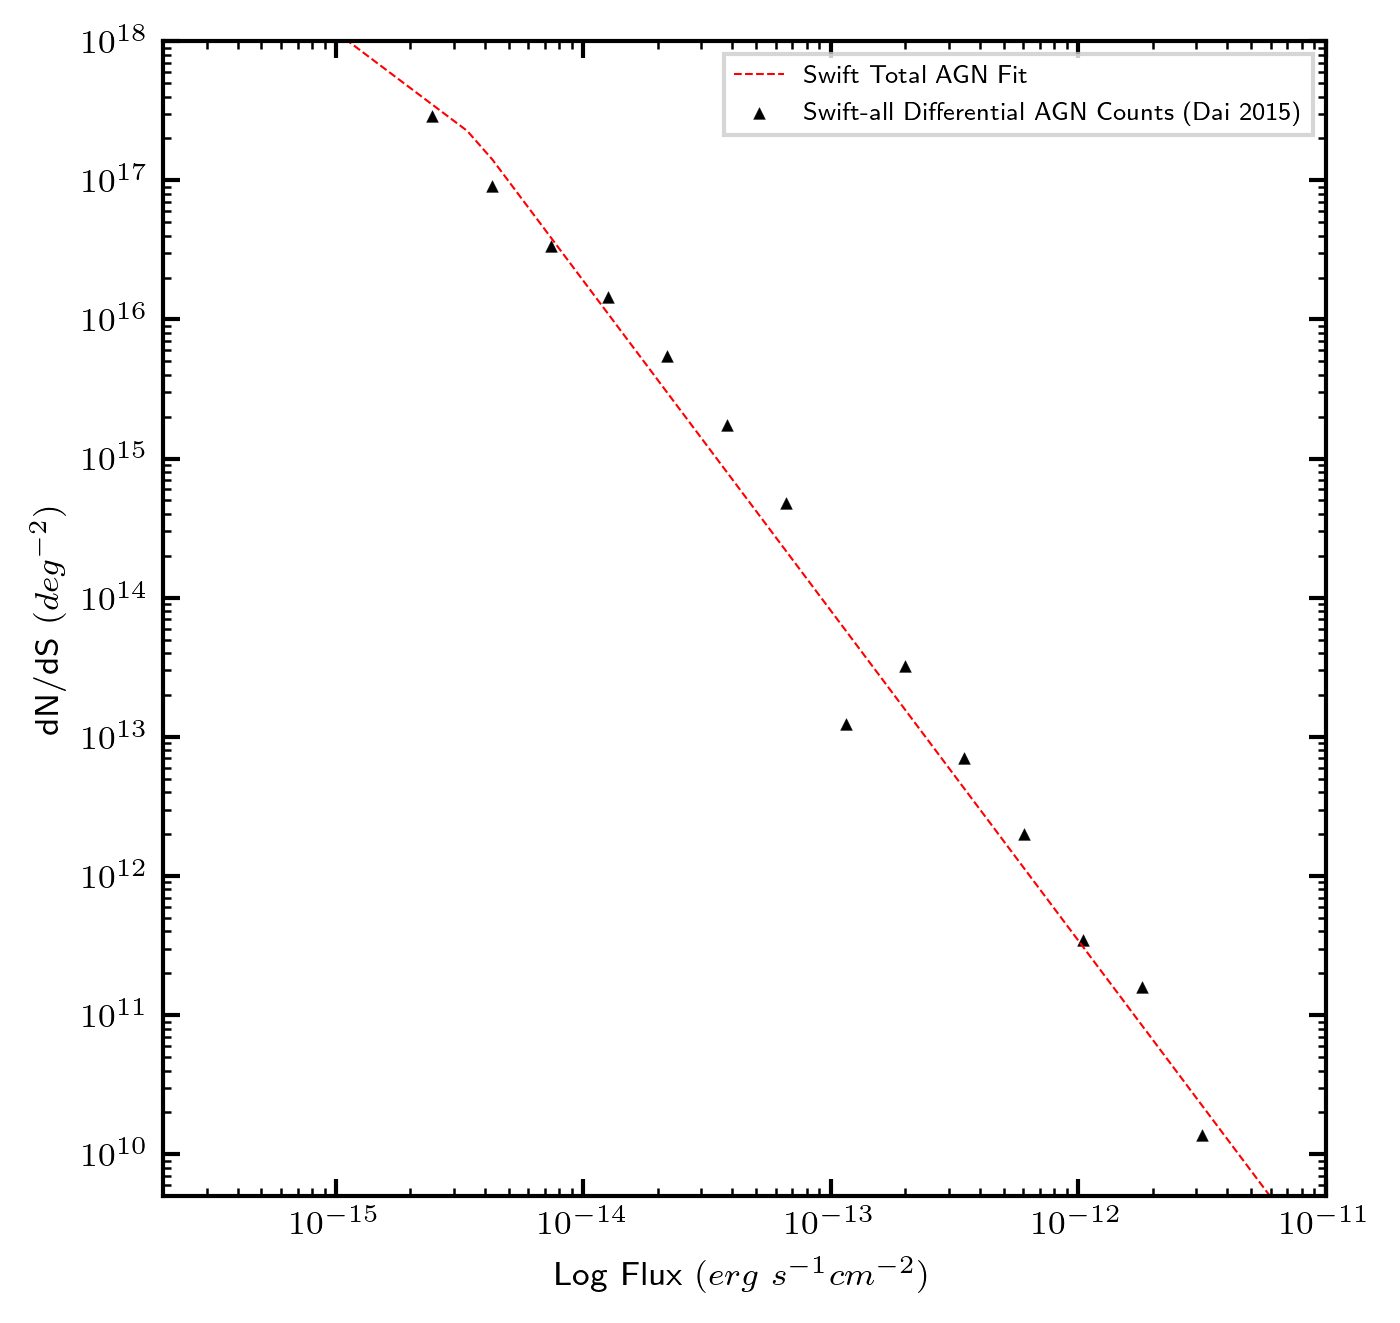

In [597]:
# Try plotting dn/ds from dai 2015:
plt.figure(figsize = [5,5], dpi = 300)
x = np.logspace(-16,-11,50)

y = np.zeros(len(x))


# Dai results 
y_vals = [1.2e18,2.91e17,9.05e16,3.39e16,1.45e16,5.5e15,1.75e15,4.8e14,1.24e13,3.24e13,7.10e12,2.02e12,3.47e11,1.59e11,1.37e10]
logx_vals = [-14.85,-14.61,-14.37,-14.13,-13.90,-13.66,-13.42,-13.18,-12.94,-12.70,-12.46,-12.22,-11.98,-11.74,-11.50]
x_vals = np.power(10,logx_vals)
for i in range(0,len(x)):
    if x[i] <= f_b:
        y[i] = dn_1(x[i])
    else:
        y[i] = dn_2(x[i])
        
plt.plot(x,y, linestyle = '--', linewidth = 0.5, color = 'r', label = 'Swift Total AGN Fit')
plt.scatter(x_vals,y_vals,marker = '^', linewidth = 0.1, s =8, color = 'black', label ='Swift-all Differential AGN Counts (Dai 2015)')
plt.xlim(2e-16,1e-11)
plt.ylim(5e9,1e18)
plt.xscale('log')
plt.yscale('log')

plt.xlabel('Log Flux ' + (r'$(erg \ s^{-1} cm^{-2})$'), fontsize = 8)
plt.ylabel('dN/dS ' + r'$(deg^{-2})$', fontsize = 8)

plt.legend(fontsize = 6, loc = 'upper right', fancybox = False)

plt.savefig('/Users/bbonine/ou/general_exam/figs/dnds.png')

In [3]:
# Analytically integrate above dn/ds relations using appropriate bounds
def n_1(s):
    return k*(1/(-a+1))*(1/s_ref)**(-a)*(f_b**(-a+1)-s**(-a+1))

def n_2(s):
    return k*(f_b/s_ref)**(b-a)*(1/s_ref)**(-b)*(1/(-b+1))*(-s**(-b+1))

In [6]:
# Try integrating
x = np.logspace(-16,-11,50)

y = np.zeros(len(x))

for i in range(0,len(x)):
    if x[i] > f_b:
        y[i] = n_2(x[i])
        

    
    else:
        y[i] = n_1(x[i])+n_2(f_b)


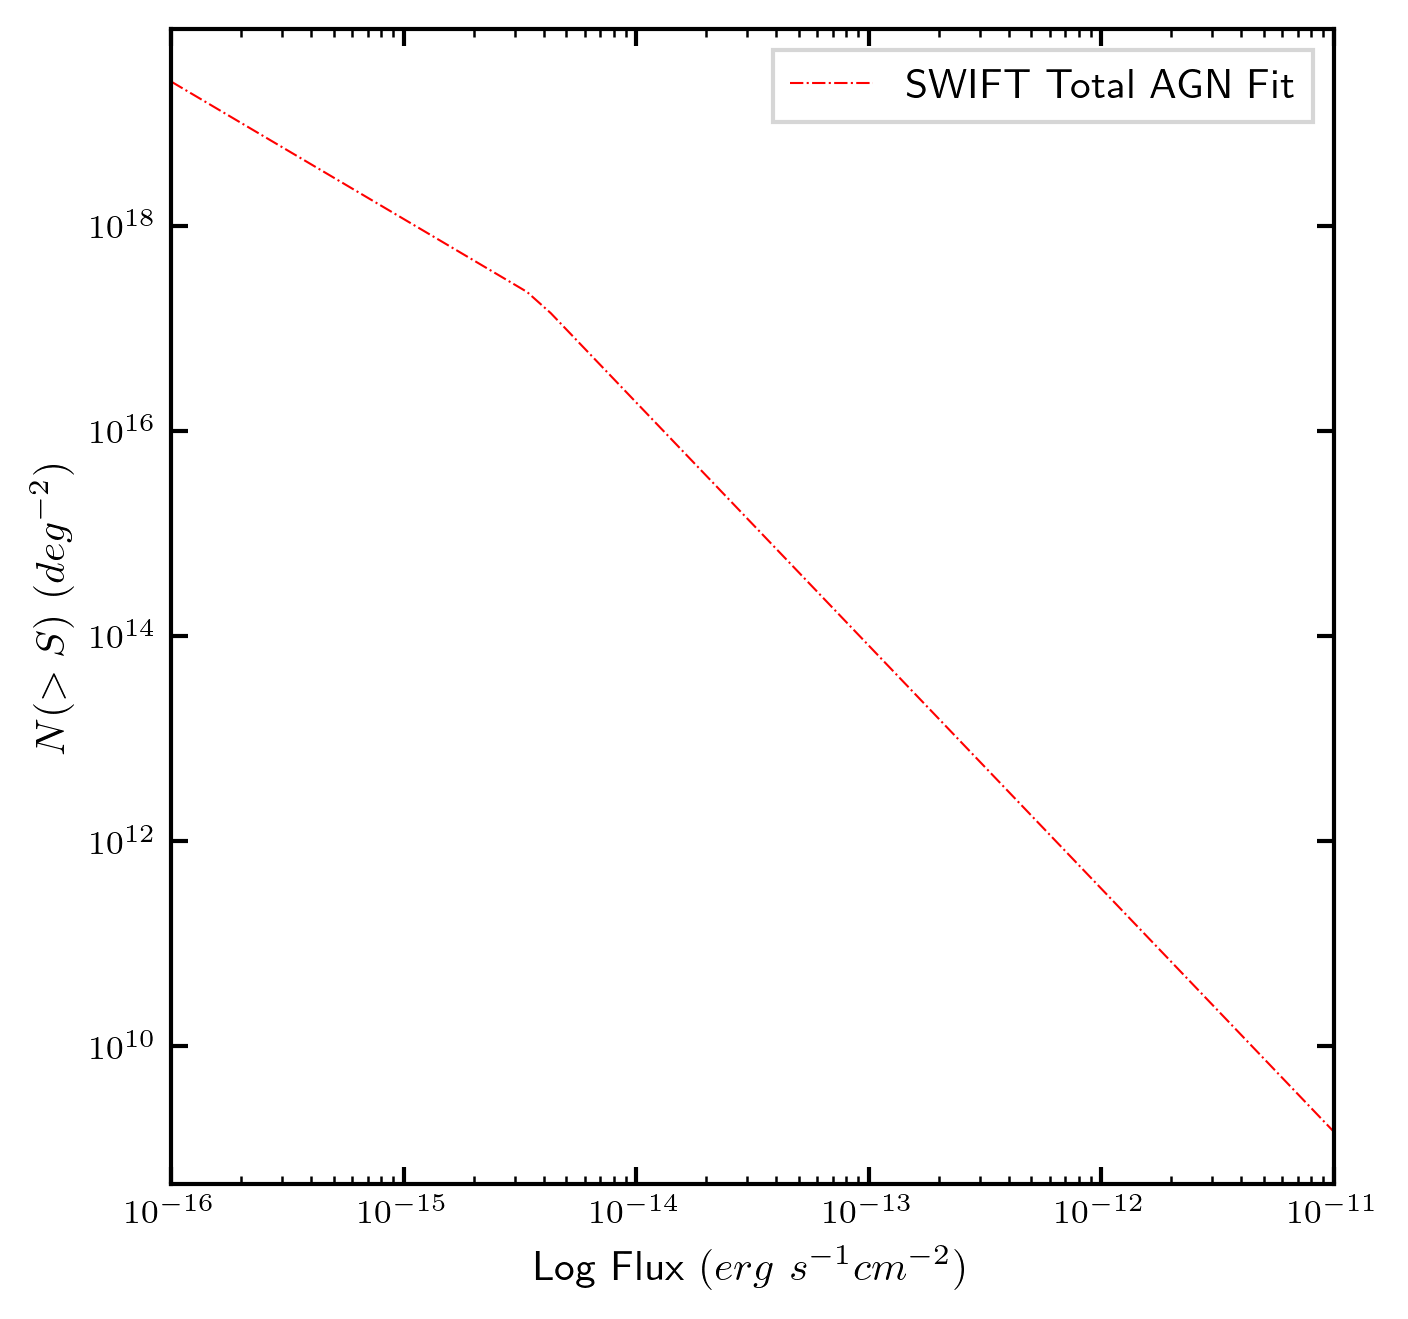

In [598]:
plt.figure(figsize = [5,5], dpi = 300)
plt.plot(x,y, linestyle = '-.', linewidth = 0.5 , color = 'red', label = "SWIFT Total AGN Fit")

plt.xlim(1e-16,1e-11)



plt.xscale('log')
plt.ylabel(r'$N ( > S) \ (deg^{-2})$')
plt.xlabel('Log Flux ' + (r'$(erg \ s^{-1} cm^{-2})$'))
plt.yscale('log')
plt.legend(fancybox = False)
plt.savefig('/Users/bbonine/ou/general_exam/figs/ns.png')


In [25]:
# Try plotting number of sources vs mean exposure map value
file = "/Users/bbonine/ou/research/corr_func/outputs/1_25_21/counts.txt"

data = np.genfromtxt(file, delimiter = ',', unpack=True)
exp_mean = data[:,0]  # mean exposure map value
n_data = data[:,1]    # number of real data points for this field
n_rand = data[:,2] # number of simulated points for this field

OSError: /Users/bbonine/ou/research/corr_func/outputs/1_25_21/counts.txt not found.

In [599]:
# Plot
plt.figure(figsize = [5,5], dpi = 300)
plt.scatter(exp_mean,n_data, color = 'deeppink', s = 8, label = 'Data',alpha = 0.7, ec = 'none', marker = '.')
plt.scatter(exp_mean,n_rand, color = 'limegreen', s = 8, label = 'Random', alpha = 0.7, ec = 'none', marker = '.')

plt.xscale('log')
plt.legend(fancybox = False)

plt.xlabel("Mean Exposure Map Value")
plt.ylabel("Number of Sources")
plt.title("SACS: All Fields")


# Save 
#plt.savefig('/Users/bbonine/ou/research/corr_func/figures/exp_counts.png')

NameError: name 'exp_mean' is not defined

<Figure size 1500x1500 with 0 Axes>

In [632]:
# Find data associated with our exposure map
target = 'grb050509c'
np.where(field_list == target)[0]

path = "/Users/bbonine/ou/research/corr_func/data/"

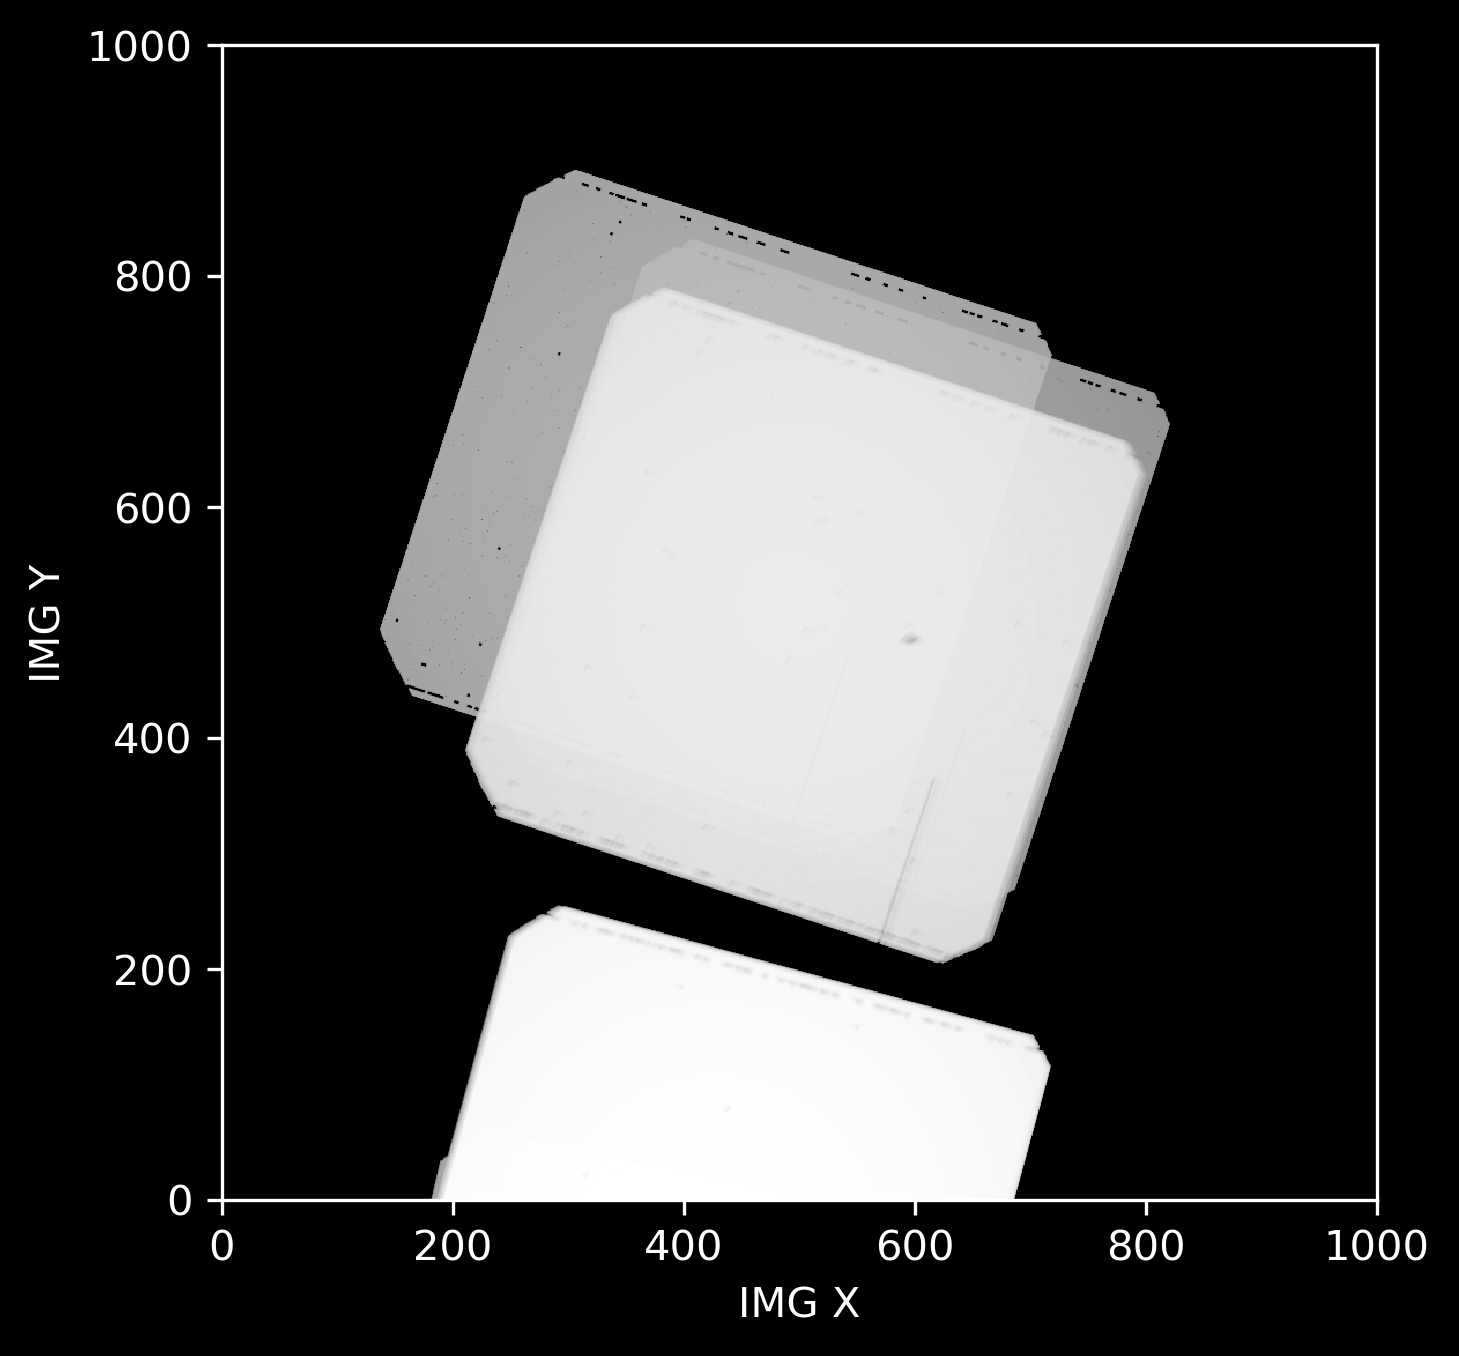

In [636]:

from matplotlib.colors import LogNorm
# Read in the relevant exposure map:
here = np.where(field_list == target)
# Extract source positions in this field:
#data_x = x[here]
#data_y = y[here]
 

# Read in exposure map with astropy

expmap = path+target +'/expo.fits'
hdu_list = fits.open(expmap)
image_data = hdu_list[0].data
hdu_list.close()
exp_map_1d =  image_data.ravel() #Conver exposure map to 1D array for later

# Restrict to fields with more than one AGN (necessary for correlation calculation):

# Save reference pixel value for later
ref_flux =  image_data[500,500]

# Use the interpolated function to extract flux limit based off reference flux
flux_lim = func1(ref_flux)

# Find the flux limit for each pixel:
fluxlimit = np.zeros(len(exp_map_1d))
for j in range(0,len(fluxlimit)):
    fluxlimit[j] = func1(exp_map_1d[j])
    
fluxlimit_1d = np.asarray(fluxlimit) #convert to numpy array
fluxlimit_2d = np.reshape(fluxlimit_1d,(-1,len(image_data[0])))

# Determine number of sources per pixel, per square degree
Npix = np.zeros(len(fluxlimit_1d))
for j in range(0,len(fluxlimit_1d)):
    if fluxlimit_1d[j] > f_b:
        Npix[j] = n_2(fluxlimit_1d[j])

    else:
        Npix[j] = n_1(fluxlimit_1d[j]) +n_2(f_b)

N = np.abs(Npix)
N_source = pixel_angle_deg*N # Number of sources
N_norm = N_source / np.max(N_source) # Normalize

# Construct weight map to gerenate random image:
weight_map = np.reshape(N_norm,(-1,len(image_data[0])))
plt.style.use('dark_background')
plt.figure(figsize = [6, 5], dpi = 300)
plt.imshow(weight_map,cmap = 'gray', interpolation = 'none', norm = LogNorm(), origin = 'lower')
#plt.text(500, 900, "Mean exposure map value: "  + str(np.mean(exp_map_1d)), color = 'white')
plt.xlabel("IMG X")
plt.ylabel("IMG Y")
plt.xlim(0,1000)
plt.ylim(0,1000)
plt.savefig('/Users/bbonine/ou/general_exam/figs/exp_map.png')
#plt.close()
#print("Exposure map " + str(i+1) + " created..." )





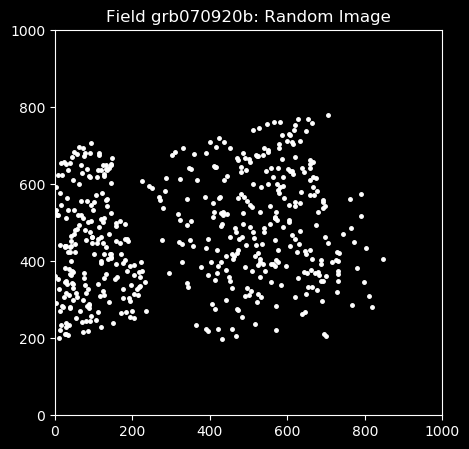

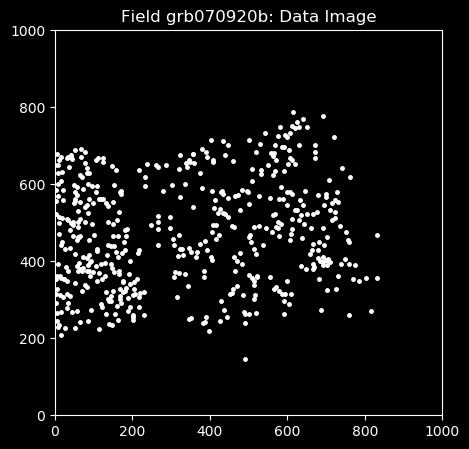

In [14]:
# Begin making random image:
weight_tot = np.sum(N_norm) 
weight_outer = np.cumsum(N_norm) # 'Outer edge' of pixel weight
weight_inner = weight_outer - N_norm # 'Inner edge' of pixel weight



'''
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Manually specify # of random sources to inspect behavior
of weight map:
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
'''
#n_sources = int(np.sum(N_source)) 
n_sources = 500

n_dim = 1000 # specify the dimmension of our image
img2 = np.zeros(n_dim*n_dim)
img3 = np.zeros(n_dim*n_dim) # delete this if only using one random image; added 11/15
var1 = np.random.uniform(0,weight_tot,n_sources)
var2 = np.random.uniform(0,weight_tot,n_sources)

'''
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Test 11/14: Repeat random image generation; call this one the data
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
'''
for l in range(0,n_sources):
    for m in range(0,len(img3)):
        if var2[l] > weight_inner[m] and var2[l] < weight_outer[m]:
            img3[m] = img3[m] + 1 # specifies flux of pixel. 

# Save random image to file:
data_img2 = np.reshape(img3,(n_dim,n_dim)) 
here3 = np.where(data_img2 > 0)
rand_x = here3[0] # image position of x values
rand_y = here3[1] # image position of y vales


if len(data_x) > 1 and len(rand_x) > 1:

   
    
    
    # Save data image to file:
    plt.style.use('dark_background')
    plt.figure(figsize = [5, 5])
    plt.scatter(rand_x,rand_y, marker = '.', color = 'white', s = 25)
    plt.xlim(0,1000)
    plt.ylim(0,1000)
    plt.title('Field '+ field[here][0] + ': Data Image')
    #plt.savefig(path2 + '/data_img.png')
    plt.show()
    #print("Random Image " + str(i+1) + " created...")
    




0

### 1/29/2021:
I believe the process of reshaping the 1d random array to a 2d random image is causing a mirroring issue. Im guessing the 0th index of the 1d array is becoming the upper left of the image instead of the lower left, which means all of our y-values might be flipped??

From the above exposure map and simulated image, it looks like we've switched the X and y vals. Let's try flipping them: 

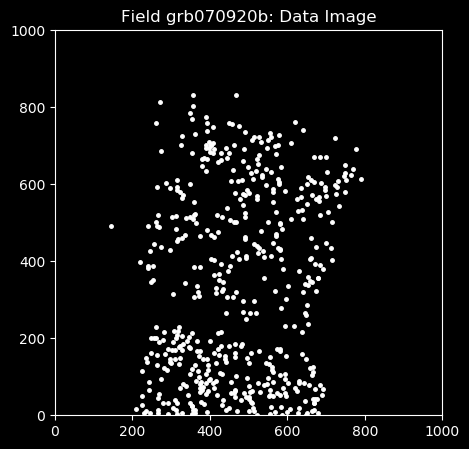

In [15]:
rand_x = here3[1] # image position of x values
rand_y = here3[0] # image position of y vales

    
# Save data image to file:
plt.style.use('dark_background')
plt.figure(figsize = [5, 5])
plt.scatter(rand_x,rand_y, marker = '.', color = 'white', s = 25)
plt.xlim(0,1000)
plt.ylim(0,1000)
plt.title('Field '+ field[here][0] + ': Data Image')
#plt.savefig(path2 + '/data_img.png')
plt.show()


____________
## 2/7/21: Try identifying source of signal at low angular scales

To investigate this, we will pick out a field that has a high number of sources. We'll save the source and random image positions to file, then send those results to Dai

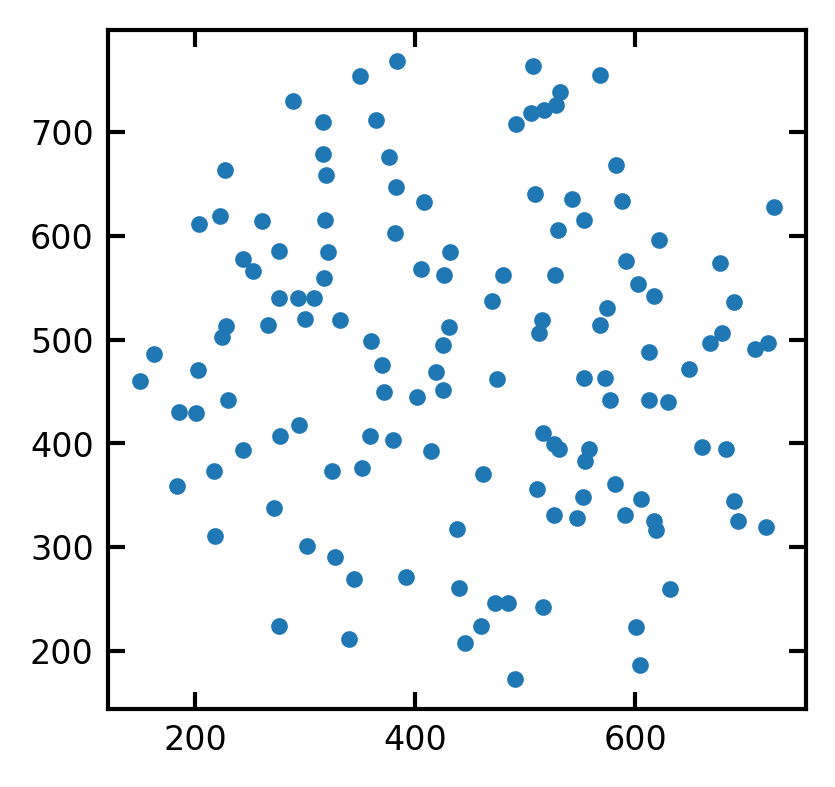

In [151]:
# Identify field with most sources
source_count = np.zeros(len(field_list))

for i in range(0,len(source_count)):
    here = np.where(field == field_list[i])[0]
    source_count[i] = len(x[here])
    
# Identify which field has the most sources
here2 = np.where(source_count == np.max(source_count))[0]

# Select sources in this region
target = np.where(field == field_list[here2])[0]
data_x = x[target]
data_y  = y[target]

# Plot
plt.scatter(data_x,data_y, marker = '.')

In [120]:
# Generate weight map

from matplotlib.colors import LogNorm


# Read in exposure map with astropy
target = field_list[here2][0]
expmap = path+target +'/expo.fits'
hdu_list = fits.open(expmap)
image_data = hdu_list[0].data
hdu_list.close()
exp_map_1d =  image_data.ravel() #Conver exposure map to 1D array for later

# Restrict to fields with more than one AGN (necessary for correlation calculation):

# Save reference pixel value for later
ref_flux =  image_data[500,500]

# Use the interpolated function to extract flux limit based off reference flux
flux_lim = func1(ref_flux)

# Find the flux limit for each pixel:
fluxlimit = np.zeros(len(exp_map_1d))
for j in range(0,len(fluxlimit)):
    fluxlimit[j] = func1(exp_map_1d[j])
    
fluxlimit_1d = np.asarray(fluxlimit) #convert to numpy array
fluxlimit_2d = np.reshape(fluxlimit_1d,(-1,len(image_data[0])))

# Determine number of sources per pixel, per square degree
Npix = np.zeros(len(fluxlimit_1d))
for j in range(0,len(fluxlimit_1d)):
    if fluxlimit_1d[j] > f_b:
        Npix[j] = n_2(fluxlimit_1d[j])

    else:
        Npix[j] = n_1(fluxlimit_1d[j]) +n_2(f_b)

N = np.abs(Npix)
N_source = pixel_angle_deg*N # Number of sources
N_norm = N_source / np.max(N_source) # Normalize

# Construct weight map to gerenate random image:
weight_map = np.reshape(N_norm,(-1,len(image_data[0])))
#plt.style.use('default')
#plt.figure(figsize = [10, 10])
#plt.imshow(weight_map,cmap = 'gray', interpolation = 'none', norm = LogNorm(), origin = 'lower')
#plt.text(500, 900, "Mean exposure map value: "  + str(np.mean(exp_map_1d)), color = 'white')
#plt.title('Field '+target+ ': Normalized sources per pixel')
#plt.savefig(path4+target+'/expmap.png')
#plt.close()
#print("Exposure map " + str(i+1) + " created..." )




In [121]:
# Generate random image
# Begin making random image:
weight_tot = np.sum(N_norm) 
weight_outer = np.cumsum(N_norm) # 'Outer edge' of pixel weight
weight_inner = weight_outer - N_norm # 'Inner edge' of pixel weight





n_sources = int(np.sum(N_source)) 

n_dim = 1000 # specify the dimmension of our image
img2 = np.zeros(n_dim*n_dim)

var1 = np.random.uniform(0,weight_tot,n_sources)


'''
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Test 11/14: Repeat random image generation; call this one the data
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
'''
for l in range(0,n_sources):
    for m in range(0,len(img2)):
        if var1[l] > weight_inner[m] and var1[l] < weight_outer[m]:
            img2[m] = img2[m] + 1 # specifies flux of pixel. 

# Save random image :
rand_img = np.reshape(img2,(n_dim,n_dim)) 
here3 = np.where(rand_img > 0)
rand_x = here3[1] # image position of x values
rand_y = here3[0] # image position of y vales




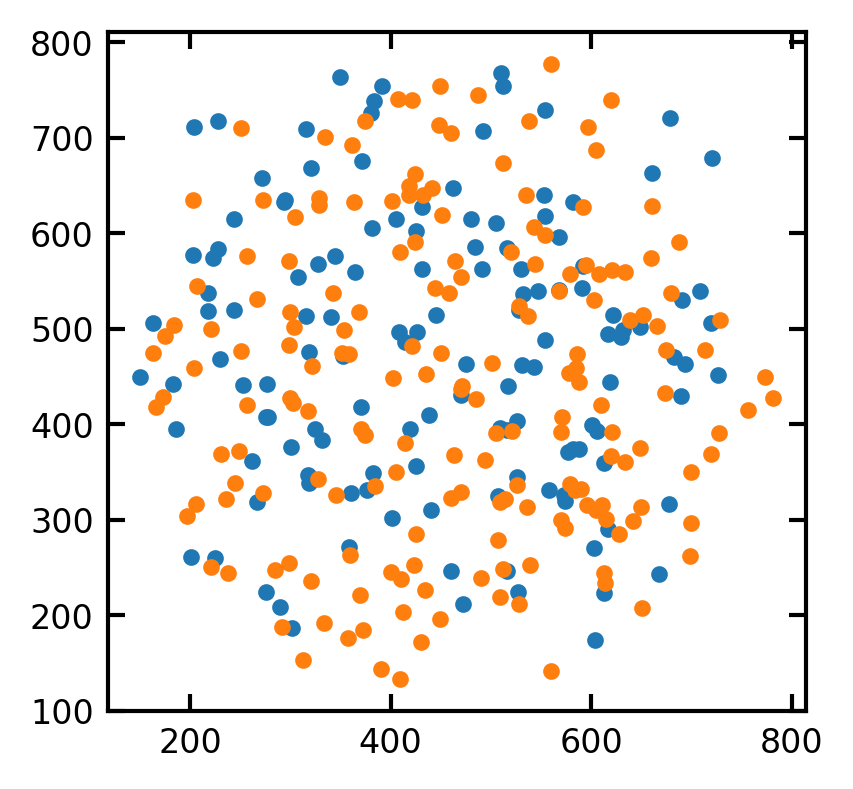

In [67]:
plt.scatter(data_x,data_y,color = 'tab:blue',marker = '.')
plt.scatter(rand_x,rand_y, color = 'tab:orange',marker = '.')

In [122]:
# Compute 2pacf
def distance(x2,x1,y2,y1):
    return (((x2-x1)**2 + (y2-y1)**2)**0.5)

# Hamilton orrelation function estimator:


def W_ham(N,DD,DR,RR):
    return (N*(( DD* RR) / (DR)**2) ) -1

In [123]:
num_bins = 8
bins_lin = np.linspace(0,1416,num_bins)
centers_lin = 0.5*(bins_lin[1:]+ bins_lin[:-1])
if (len(data_x) > 1) and (len(rand_x) > 1):  
    dist_rr = []
    for j in range(len(rand_x)):
        for k in range(len(rand_x)):
            if k != j:
                dist_rr.append(distance(rand_x[k],rand_x[j],rand_y[k],rand_y[j]))



    # Repeat same process for data-data:
    dist_dd = []
    for j in range(len(data_x)):
        for k in range(len(data_x)):
            if k != j:
                dist_dd.append(distance(data_x[k],data_x[j],data_y[k],data_y[j]))

    # And data-random:
    dist_dr = []
    for j in range(len(data_x)):
        for k in range(len(rand_x)):
            dist_dr.append(distance(rand_x[k],data_x[j],rand_y[k],data_y[j]))
            
            
# Convert to angular distance
rr_ang_dist = pix_scale * np.asarray(dist_rr) # arcsec/pix * pix = arcsec
dd_ang_dist = pix_scale * np.asarray(dist_dd)
dr_ang_dist = pix_scale * np.asarray(dist_dr)

# Bin 
dd_1 = (np.histogram(dd_ang_dist, bins = bins_lin)[0]) /2
dr_1 = np.histogram(dr_ang_dist, bins = bins_lin)[0]
rr_1 = (np.histogram(rr_ang_dist, bins = bins_lin)[0]) /2
            

In [124]:
N_d = len(data_x)
N_r = len(rand_x)
N_corr = (N_d*N_r)**2 / ((N_d*(N_d-1)) * (N_r*(N_r-1)))

corr_lin = W_ham(N_corr,dd_1,dr_1,rr_1)
varr_lin = 3*(1+(corr_lin)**2) / dd_1

In [125]:
print(N_d)
print(N_r)
print(corr_lin)

134
181
[-0.77705396 -0.73981055 -0.75818122 -0.747039   -0.74171436 -0.74471235
 -0.76751175]


In [126]:

print("Total data pairs: " + str(np.sum(dd_1)))
print("(N*(N-1)/2): " +str((len(data_x)*(len(data_x)-1))/2))
print("-------------------------")

print("Total random pairs: " + str(np.sum(rr_1)))
print("(N*(N-1)/2): " +str((len(rand_x)*(len(rand_x)-1))/2))


Total data pairs: 8903.0
(N*(N-1)/2): 8911.0
-------------------------
Total random pairs: 16231.0
(N*(N-1)/2): 16290.0


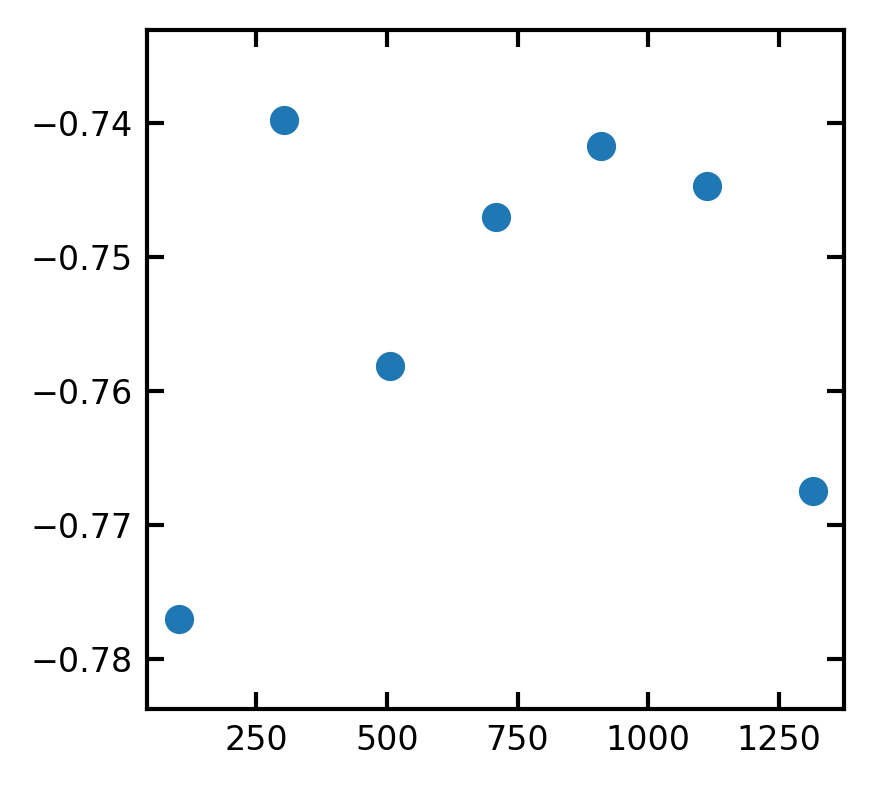

In [127]:
plt.scatter(centers_lin,corr_lin)

In [128]:
# Save to file
path2 = '/Users/bbonine/ou/research/corr_func/outputs/02_03_21/'


In [138]:
# Save data to file
np.savetxt(path2+'data.txt',np.transpose([data_x,data_y]))

In [139]:
# Save random image to file
np.savetxt(path2+'rand.txt',np.transpose([rand_x,rand_y]))

In [132]:
rand_test

array([[483., 151.],
       [462., 183.],
       [450., 189.],
       [377., 197.],
       [552., 209.],
       [637., 209.],
       [380., 210.],
       [618., 219.],
       [333., 220.],
       [622., 223.],
       [649., 225.],
       [399., 229.],
       [529., 237.],
       [433., 240.],
       [257., 247.],
       [266., 261.],
       [546., 268.],
       [549., 275.],
       [578., 275.],
       [661., 278.],
       [484., 287.],
       [685., 287.],
       [359., 289.],
       [518., 297.],
       [489., 305.],
       [495., 305.],
       [627., 308.],
       [296., 313.],
       [504., 314.],
       [266., 321.],
       [673., 321.],
       [539., 324.],
       [431., 329.],
       [318., 334.],
       [392., 335.],
       [166., 336.],
       [721., 336.],
       [691., 338.],
       [376., 343.],
       [411., 345.],
       [471., 345.],
       [574., 346.],
       [228., 352.],
       [565., 360.],
       [655., 364.],
       [378., 365.],
       [720., 368.],
       [463.,

In [103]:
corr_lin

array([-0.77417851, -0.7464572 , -0.73822855, -0.74844858, -0.74937543,
       -0.75727873, -0.78398331])

In [104]:
varr_lin

array([0.00786567, 0.0028024 , 0.00219146, 0.0023148 , 0.00319774,
       0.0062605 , 0.01953181])

<ErrorbarContainer object of 3 artists>

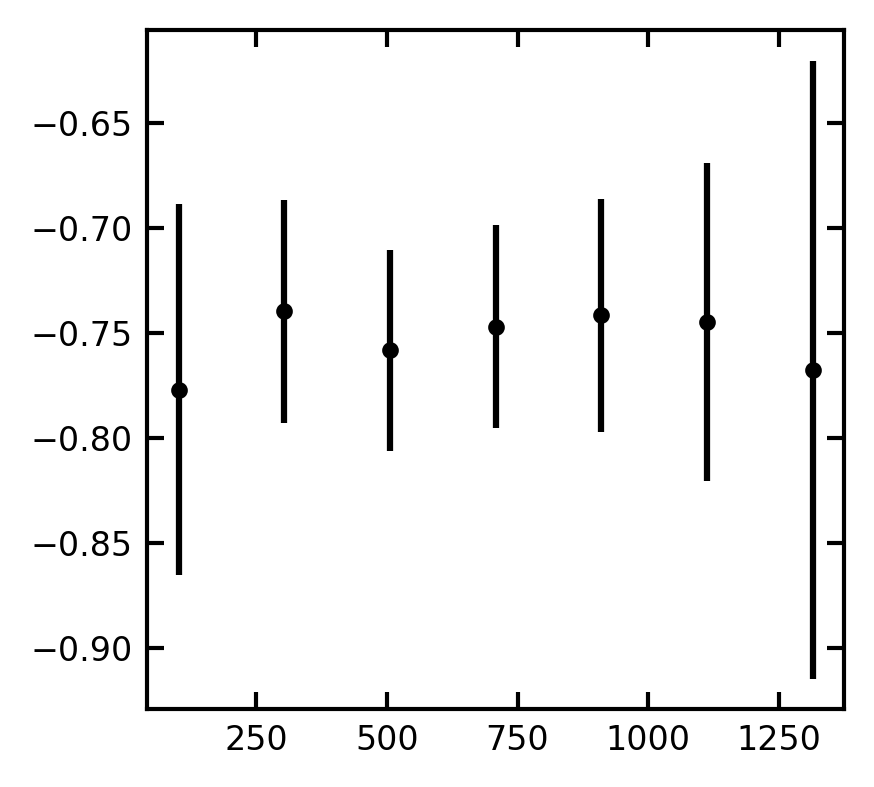

In [133]:
# Plot

plt.errorbar(centers_lin,corr_lin, yerr = np.sqrt(varr_lin), fmt = 'k.')

In [135]:
np.savetxt(path2+ 'corr.txt', (centers_lin,corr_lin,varr_lin), delimiter = ',')

In [137]:
np.savetxt(path2+'corr.txt',np.transpose([centers_lin,corr_lin,varr_lin]))

## Inspect Dai's stuff

In [143]:
# Read in file
path ='/Users/bbonine/ou/research/corr_func/dai_debug/'
data = np.loadtxt(path+'brett.txt',unpack = True,skiprows = 1)

In [251]:
bin_start = data[0]
bin_end = data[1]
dd_dai = data[2]
rr_dai = data[3]
dr_dai = data[4]
dr_cal_dai = data[5]
corr_dai = data[6]
sig_dai = data[7]

In [223]:
# Find bin centers
centers = (bin_start+bin_end)/2
print(centers)
print(len(centers))
print(len(corr))

[ 15.  45.  75. 105. 135. 165. 195. 225. 255. 285. 315. 345. 375. 405.
 435. 465. 495. 525. 555. 585. 615.]
21
21


<ErrorbarContainer object of 3 artists>

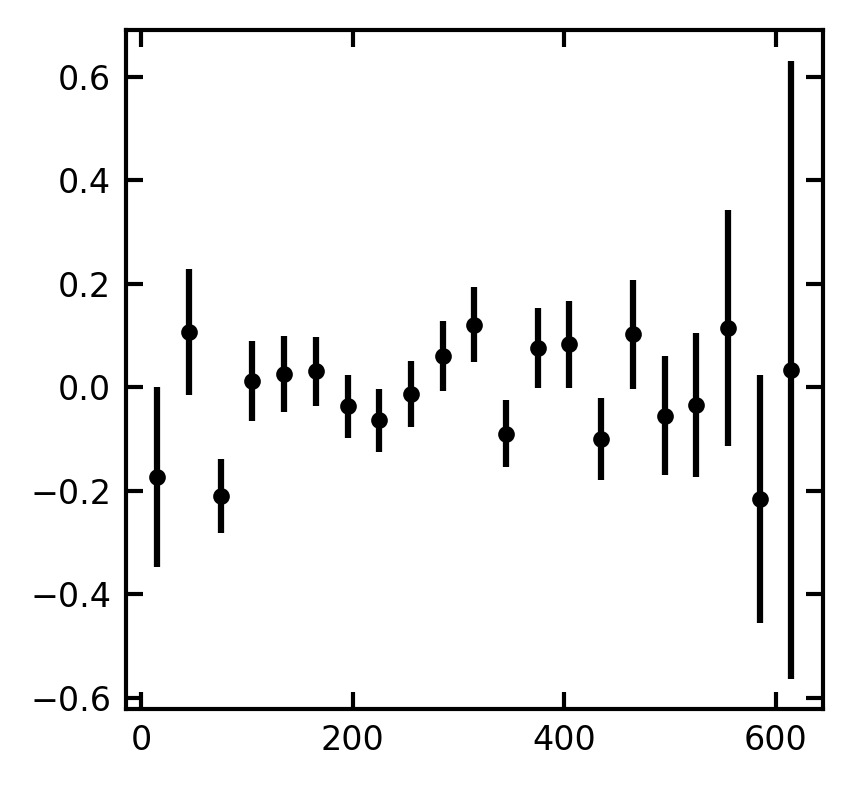

In [172]:
# Plot
plt.errorbar(centers,corr,yerr = sig, fmt = 'k.')

In [279]:
## Compare with my results
# Read in image and random sources
data_x, data_y = np.loadtxt(path+'data.txt',unpack = True, skiprows =1)
rand_x, rand_y = np.loadtxt(path+'rand.txt',unpack = True, skiprows = 1)


In [253]:
# Calculate Corr func
# Compute 2pacf
def distance(x2,x1,y2,y1):
    return (((x2-x1)**2 + (y2-y1)**2)**0.5)

# Hamilton orrelation function estimator:


def W_ham(N,DD,DR,RR):
    return (N*(( DD* RR) / (DR)**2) ) -1


num_bins = 22
bins_lin = np.linspace(0,630,num_bins)
centers = 0.5*(bins_lin[1:]+ bins_lin[:-1])
if (len(data_x) > 1) and (len(rand_x) > 1):  
    dist_rr = []
    for j in range(len(rand_x)):
        for k in range(len(rand_x)):
            if k != j:
                dist_rr.append(distance(rand_x[k],rand_x[j],rand_y[k],rand_y[j]))



    # Repeat same process for data-data:
    dist_dd = []
    for j in range(len(data_x)):
        for k in range(len(data_x)):
            if k != j:
                dist_dd.append(distance(data_x[k],data_x[j],data_y[k],data_y[j]))

    # And data-random:
    dist_dr = []
    for j in range(len(data_x)):
        for k in range(len(rand_x)):
            dist_dr.append(distance(rand_x[k],data_x[j],rand_y[k],data_y[j]))
            
'''     
#Convert to angular distance
rr_ang_dist = pix_scale * np.asarray(dist_rr) # arcsec/pix * pix = arcsec
dd_ang_dist = pix_scale * np.asarray(dist_dd)
dr_ang_dist = pix_scale * np.asarray(dist_dr)

# Bin 
dd_1 = (np.histogram(dd_ang_dist, bins = bins_lin)[0]) 
dr_1 = np.histogram(dr_ang_dist, bins = bins_lin)[0]
rr_1 = (np.histogram(rr_ang_dist, bins = bins_lin)[0]) 


'''
dd_1 = (np.histogram(dist_dd, bins = bins_lin)[0]) /2
dr_1 = np.histogram(dist_dr, bins = bins_lin)[0] / 2
rr_1 = (np.histogram(dist_rr, bins = bins_lin)[0]) /2



# Grab relevant values
N_d = len(data_x)
N_r = len(rand_x)
N_corr = (N_d*N_r)**2 / ((N_d*(N_d-1)) * (N_r*(N_r-1)))

# Calculate
corr_lin = W_ham(N_corr,dd_1,dr_1,rr_1)
varr_lin = 3*(1+(corr_lin)**2) / dd_1


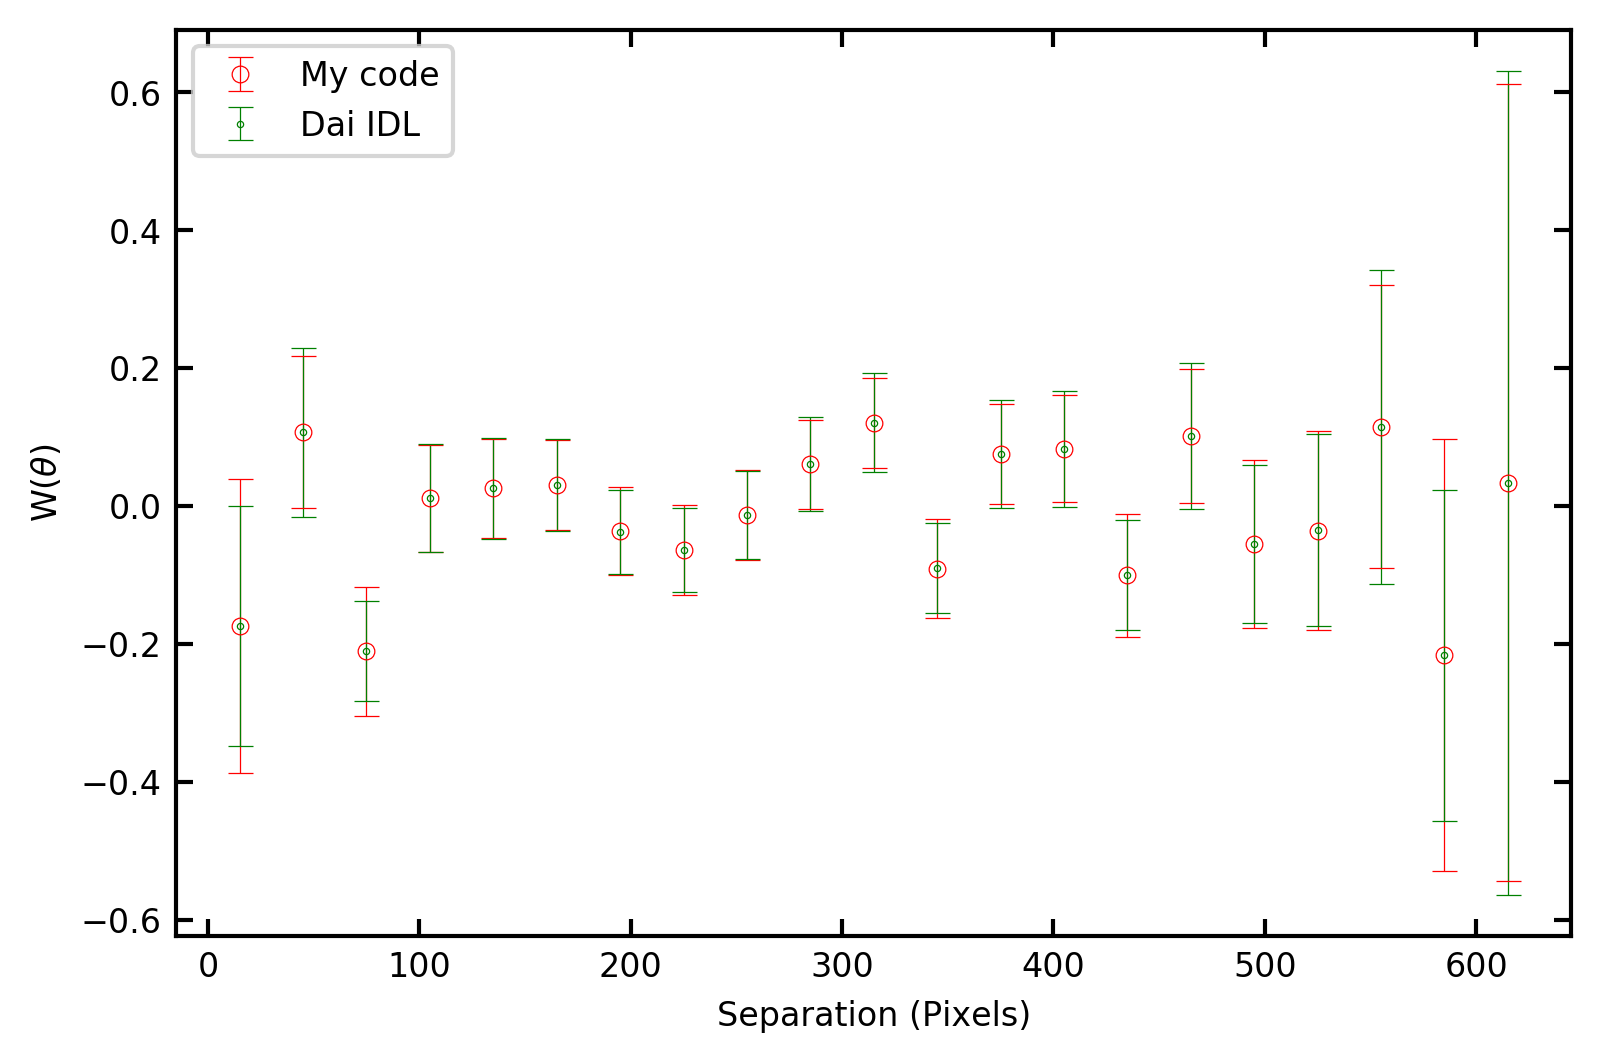

In [254]:
# Plot
plt.figure(figsize=[6,4])

# My results
plt.errorbar(centers, corr_lin, yerr=np.sqrt(varr_lin), fmt='ro', elinewidth = 0.3, capsize = 3,ms = 4, mew =0.3, mfc = 'none', label = "My code")

# Dai comparison
plt.errorbar(centers, corr_dai, yerr=sig_dai, fmt='g.', elinewidth = 0.3, capsize = 3,ms = 3, mew =0.3, mfc = 'none', label = "Dai IDL")



plt.xlabel('Separation (Pixels)')
plt.ylabel(r'W$(\theta)$') 

plt.legend()

#plt.savefig(path+'comparison_fixed.png')


In [247]:
print("Data-Data:")
print("Sum of my DD histogram: " + str(np.sum(dd_1)))
print("Sum of Dai's DD hist:" + str(np.sum(dd)))
print("(N_D*(N_D-1))/2: " + str((len(data_x)*(len(data_x)-1))/2))

print("----------------------------------------------")
print("Random-Random:")
print("Sum of my RR histogram: " + str(np.sum(rr_1)))
print("Sum of Dai's RR hist:" + str(np.sum(rr)))
print("(N_R*(N_R-1))/2: " + str((len(rand_x)*(len(rand_x)-1))/2))

print("----------------------------------------------")
print("Data-Random:")
print("Sum of my DR histogram: " + str(np.sum(dr_1)))
print("Sum of Dai's DR hist:" + str(np.sum(dr_cal)))
print("(N_r*N_d)/2: " + str(0.5*(len(rand_x)*len(data_x))))



Data-Data:
Sum of my DD histogram: 8911.0
Sum of Dai's DD hist:8911.0
(N_D*(N_D-1))/2: 8911.0
----------------------------------------------
Random-Random:
Sum of my RR histogram: 16280.0
Sum of Dai's RR hist:16280.0
(N_R*(N_R-1))/2: 16290.0
----------------------------------------------
Data-Random:
Sum of my DR histogram: 12121.5
Sum of Dai's DR hist:12121.5
(N_r*N_d)/2: 12127.0


In [244]:
(N_r*N_d) /2

12127.0

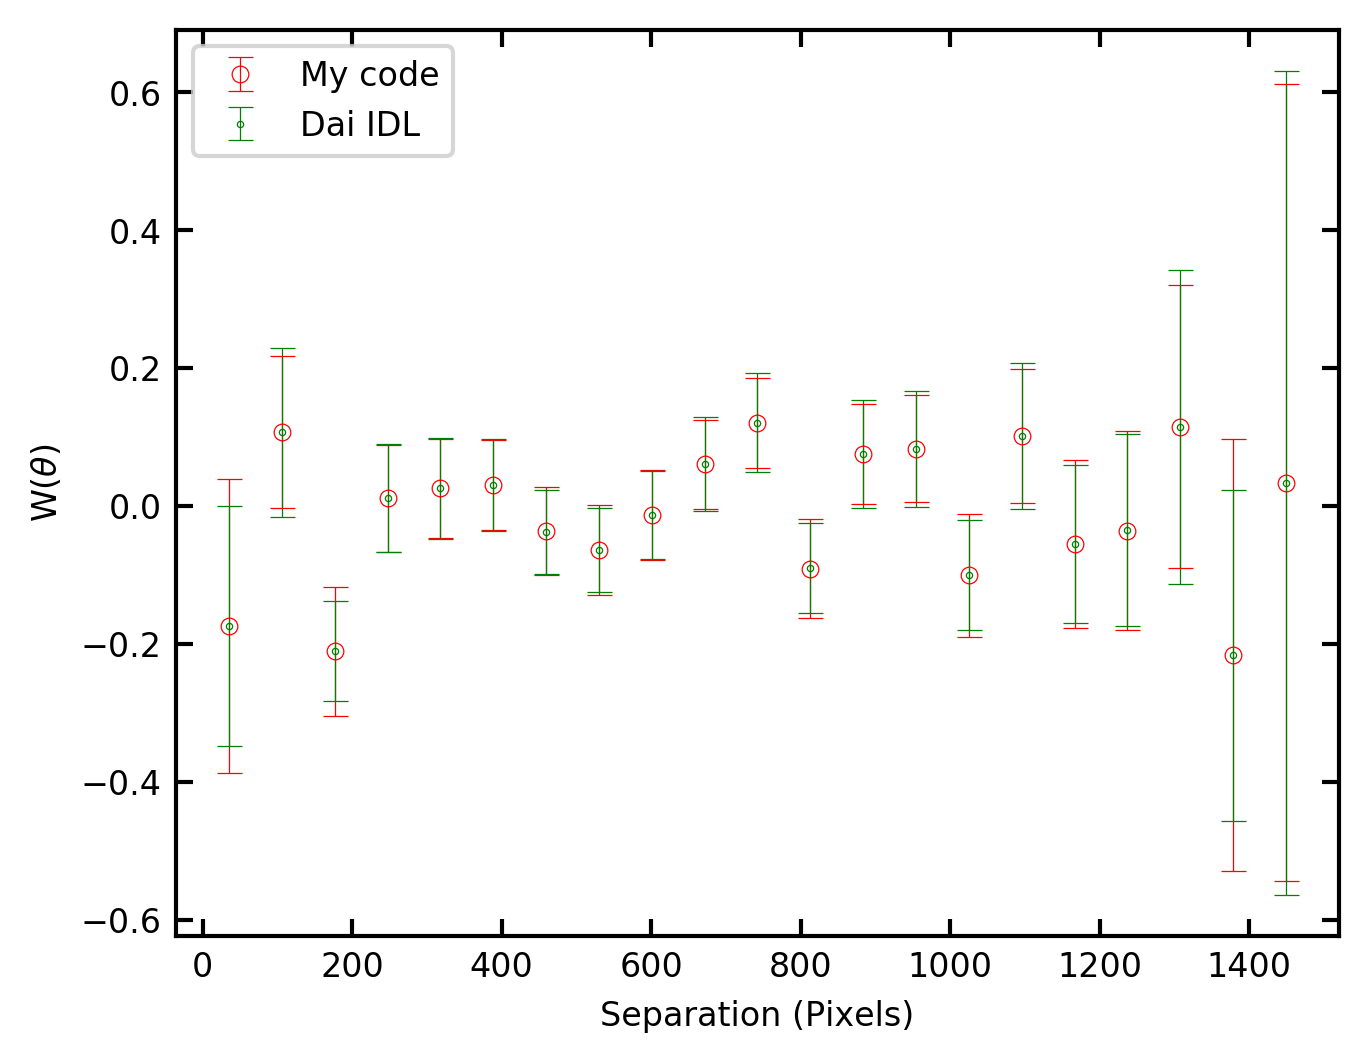

In [258]:
plt.figure(figsize = [5,4], dpi = 300)
centers_angle = centers*pix_scale
# My results
plt.errorbar(centers_angle, corr_lin, yerr=np.sqrt(varr_lin), fmt='ro', elinewidth = 0.3, capsize = 3,ms = 4, mew =0.3, mfc = 'none', label = "My code")

# Dai comparison
plt.errorbar(centers_angle, corr_dai, yerr=sig_dai, fmt='g.', elinewidth = 0.3, capsize = 3,ms = 3, mew =0.3, mfc = 'none', label = "Dai IDL")
plt.xlabel('Separation (Pixels)')
plt.ylabel(r'W$(\theta)$') 

plt.legend()


In [296]:
# Read in file
path ='/Users/bbonine/ou/research/corr_func/outputs/02_09_21_rand/'
path2 ='/Users/bbonine/ou/research/corr_func/figures/02_09_21_rand/'
centers, corr, varr = np.loadtxt(path+'corr_mean.txt',unpack = True, skiprows = 1)


In [297]:
# Plot
pix_scale = 47.1262 / 20 # arcseconds / pixel
centers_angle = centers*pix_scale

plt.figure(figsize = [5,4], dpi = 300)
plt.errorbar(centers_angle, corr, yerr=np.sqrt(varr), fmt='ko', elinewidth = 0.3, capsize = 3,ms = 4, mew =0.3, mfc = 'none')
plt.xlabel('Separation (Arcsec)')
plt.ylabel(r'W$(\theta)$')
plt.title('2paCF: Two Random Images')

plt.savefig(path2+'corrfunc_mean.png')
plt.close()

## 2/11/21: 
Try weighted average on null results to improve errorbars

In [44]:
# Read in values
path ='/Users/bbonine/ou/research/corr_func/outputs/02_15_21_rand_15bin/'
path2 ='/Users/bbonine/ou/research/corr_func/figures/02_15_21_rand_15bin/'


centers, corr, varr = np.loadtxt(path+'corr_mean.txt', skiprows = 1, unpack = True)

OSError: /Users/bbonine/ou/research/corr_func/outputs/02_15_21_rand_15bin/corr_mean.txt not found.

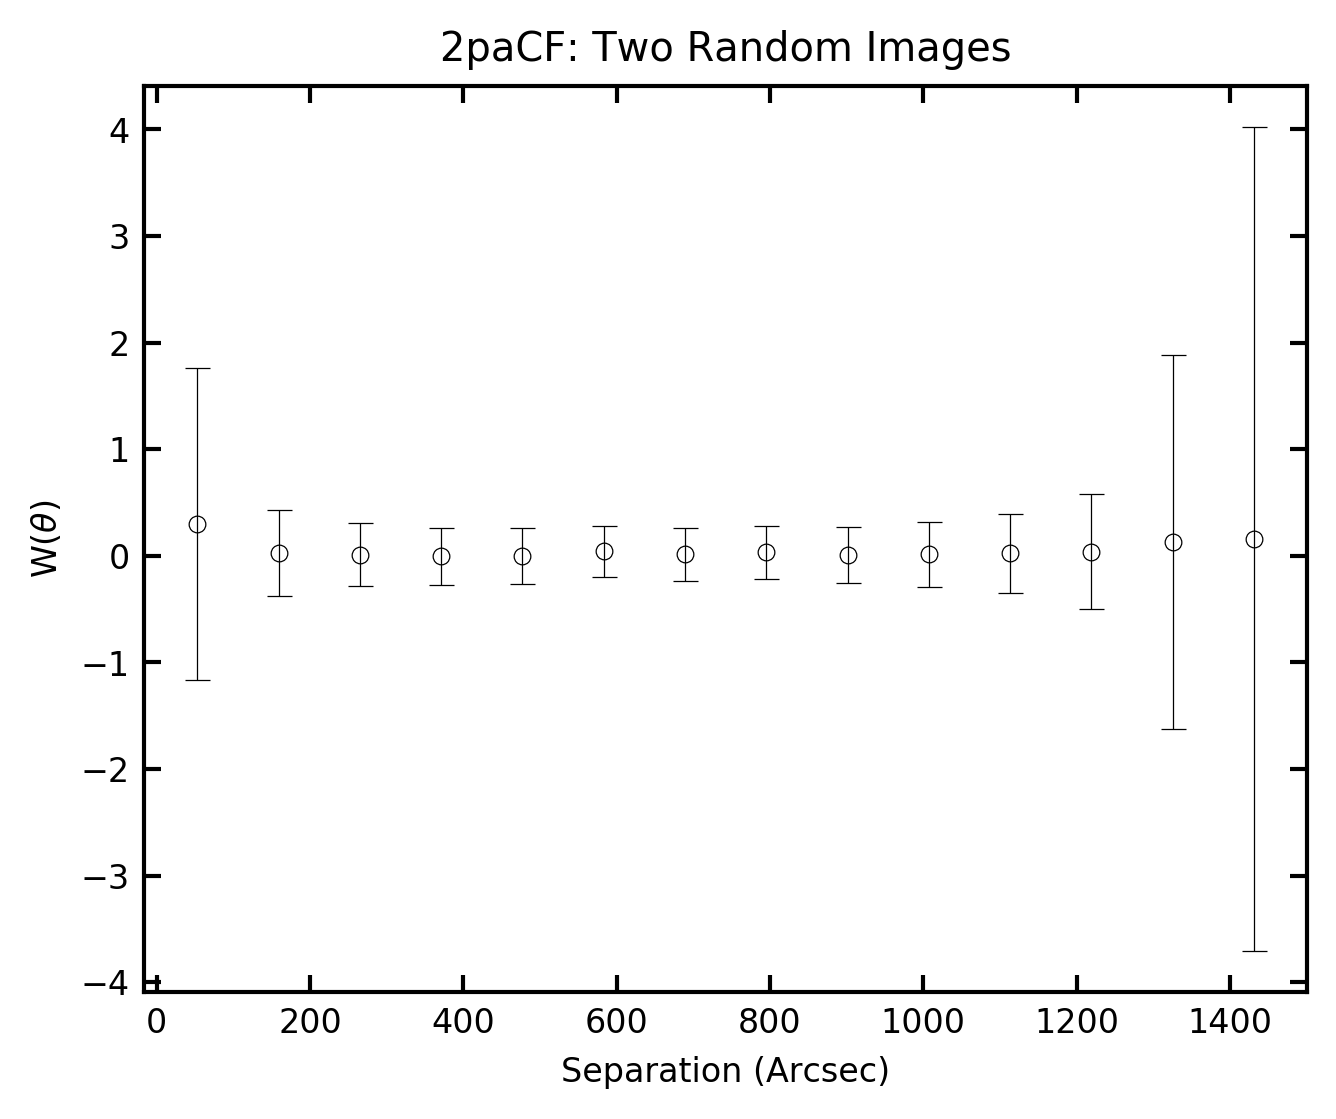

In [99]:
# Plot
pix_scale = 47.1262 / 20 # arcseconds / pixel
centers_angle = centers*pix_scale

plt.figure(figsize = [5,4], dpi = 300)
plt.errorbar(centers_angle, corr, yerr=np.sqrt(varr), fmt='ko', elinewidth = 0.3, capsize = 3,ms = 4, mew =0.3, mfc = 'none')
plt.xlabel('Separation (Arcsec)')
plt.ylabel(r'W$(\theta)$')
plt.title('2paCF: Two Random Images')
plt.savefig(path2+'corr_mean.png')


In the above plot,we calculated both the mean of  W and the varience directly. Next we'll try the "Standard Error of the Weighted Mean" approach

In [604]:
# Try to read
path ='/Users/bbonine/ou/research/corr_func/outputs/all/02_15_21_rand_15bin/'

file  = np.load(path+'corr_raw.npz')
centers, corr, varr = np.loadtxt(path+'corr_mean.txt', skiprows = 1, unpack = True)


In [605]:
# Select corr func measurements
corr_raw = file['corr']
varr_raw = file['varr']

# Clear out first row; zero for some reason
corr_new = np.delete(corr_raw,0,0)
varr_new = np.delete(varr_raw,0,0)
print(corr_new)
print(varr_new)

[[ 1.34559229e-01  5.06625434e-01 -4.33862813e-05 ...  1.66825397e+00
   8.75495868e-01  4.00833333e-01]
 [ 1.14969136e-01 -7.84438776e-02 -4.70825195e-01 ... -6.38750000e-01
   3.47222222e-03 -1.00000000e+00]
 [ 3.57140282e-01 -2.89428352e-01  9.47401222e-02 ...  3.11376386e-02
  -1.27072152e-01 -5.91375796e-01]
 ...
 [-3.76731302e-01  9.88759415e-02  2.13968971e-02 ... -3.43387709e-01
  -7.81129236e-01 -1.00000000e+00]
 [-4.51247166e-01  1.03174603e+00 -1.12071559e-01 ...  9.26278660e-02
  -2.68329554e-01 -1.00000000e+00]
 [ 5.84591233e-01 -3.34539586e-01 -4.60798817e-01 ...  1.16802640e+00
   1.73771284e-01 -4.75776627e-01]]
[[0.21816561 0.06732157 0.03571429 ... 0.5674607  0.588831   0.58033368]
 [0.60793074 0.75461508 0.30541909 ... 2.11200234 3.00003617 6.        ]
 [0.05637746 0.02622021 0.01288054 ... 0.05888056 0.16935789 0.67486267]
 ...
 [1.14192647 0.30293294 0.21438382 ... 0.83843634 2.41524433 2.        ]
 [0.902718   0.38709373 0.17868706 ... 0.21612427 0.53600037 2.    

In [606]:
# Find entries with values of 'zero' for the varience
null = np.where(varr_raw == 0)
print(np.unique(null[0]))


[  0  24  37  42  77  84 110 122 124 133 138 160 235 260 337]


In [607]:
# delete them
corr_new = np.delete(corr_raw,null,0)
varr_new = np.delete(varr_raw,null,0)

In [608]:
# Try again
numer = np.sum(corr_new/varr_new,axis = 0)
denom = np.sum(1/varr_new, axis = 0)


weighted_mean = numer/denom
print(weighted_mean)

[ 0.00617588  0.00912543  0.01180887 -0.00974677 -0.00193549  0.02225783
  0.02092066  0.00896232  0.00346146  0.00303128 -0.0080182   0.03091592
 -0.00264667 -0.07947692]


In [609]:
# Now the standard error of the weighted mean:
sig = np.sqrt(1/(np.sum(varr_new**(-1),axis = 0)))
print(sig)

[0.01920266 0.01109547 0.00895968 0.00804704 0.00758104 0.00745884
 0.00755305 0.00789092 0.00854756 0.00956516 0.01142552 0.01459167
 0.02097781 0.03453828]


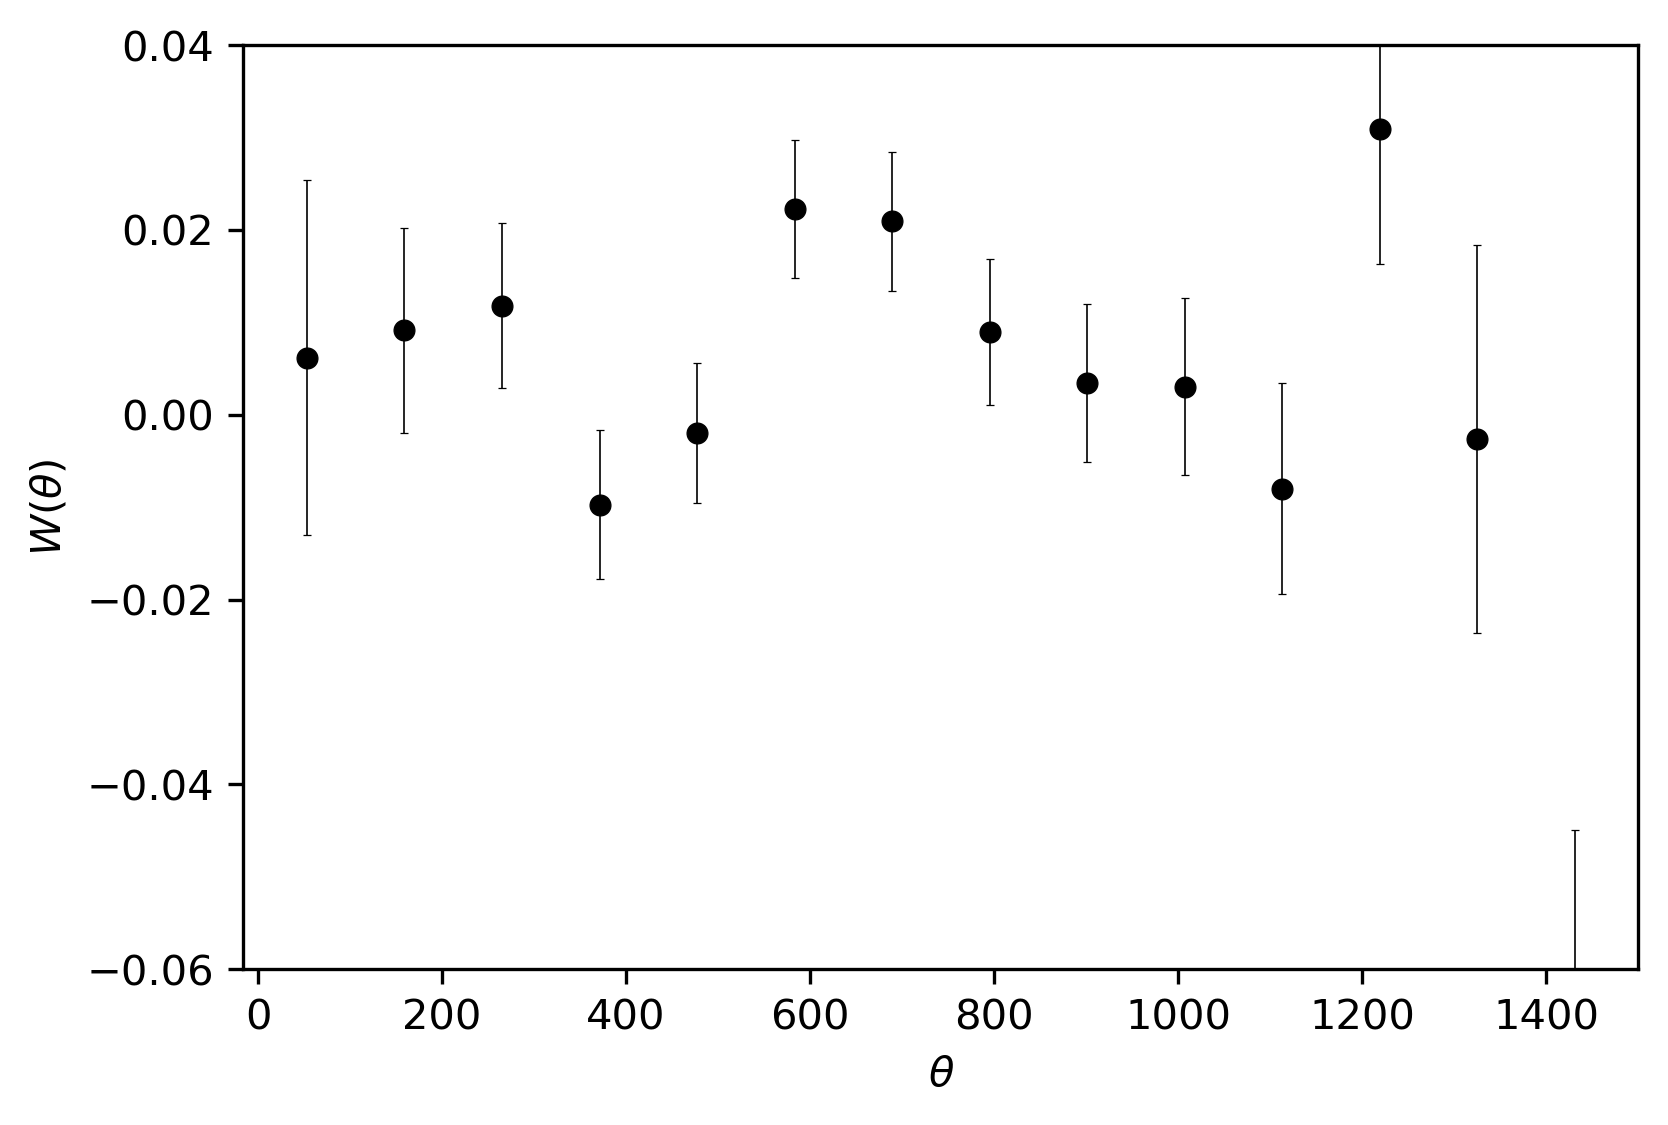

In [625]:
# Plot
plt.style.use('default')
pix_scale = 47.1262 / 20 # arcseconds / pixel
centers_angle = centers*pix_scale
plt.figure(figsize = [6,4], dpi = 300)

plt.errorbar(centers_angle, weighted_mean, yerr=sig, fmt='ko', elinewidth = 0.4, capsize = 1,ms = 5, mew =0.3)
plt.xlabel(r'$\theta $')
plt.ylabel(r'$W(\theta)$')
plt.ylim(-0.06,0.04)
#plt.yscale('log')




#plt.text(200,-0.04, r'$\mu = $' +str(np.around(np.mean(weighted_mean),3)))

plt.savefig('/Users/bbonine/ou/general_exam/figs/corr_rand.png')

In [105]:
# In function form 
def weight(corr,varr):
    
    # Identify fields that have a varience of zero
    null = np.unique(np.where(varr==0)[0])
    
    # Remove them
    corr_new = np.delete(corr_raw,null,0)
    varr_new = np.delete(varr_raw,null,0)
    
    # Evaluate Weighted mean
    corr_mu = np.sum(corr_new/varr_new,axis = 0) / np.sum(1/varr_new, axis = 0)
    
    # Evaluate Standard error of the weighted mean
    sig_mu = np.sqrt(1/(np.sum(varr_new**(-1),axis = 0)))
    
    return corr_mu, sig_mu 
    

(array([ 0.01069583,  0.00879427,  0.01335114, -0.01357768,  0.00020304,
        0.02223452,  0.02206042,  0.00844505,  0.00359875,  0.00244367,
       -0.01042116,  0.03214638, -0.00387618, -0.07922797]), array([0.01852259, 0.01070528, 0.00864448, 0.00778122, 0.00733465,
       0.0072206 , 0.00732587, 0.00767032, 0.0083273 , 0.0093535 ,
       0.01120662, 0.01438577, 0.02077398, 0.03430829]))


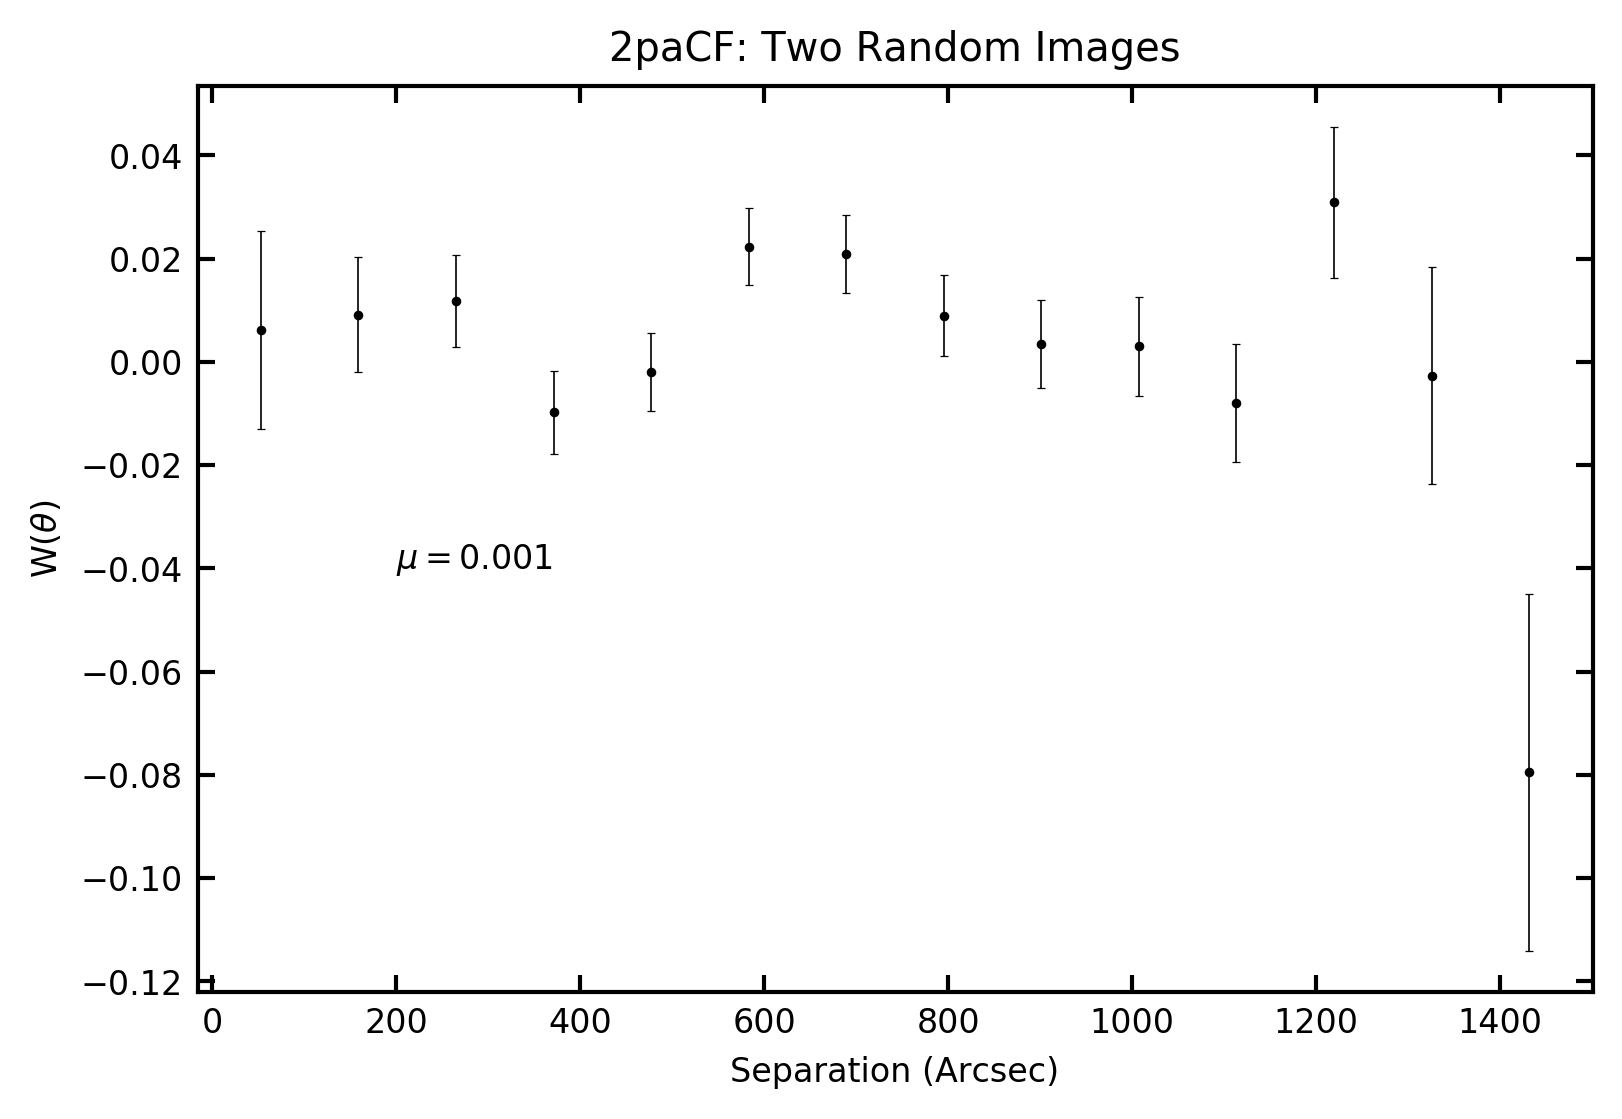

In [107]:
print(weight(corr_raw,varr_raw))
# Plot
plt.figure(figsize = [6,4], dpi = 300)
plt.errorbar(centers_angle, weighted_mean, yerr=sig, fmt='ko', elinewidth = 0.4, capsize = 1,ms = 2, mew =0.3)
plt.xlabel('Separation (Arcsec)')
plt.ylabel(r'W$(\theta)$')
plt.title('2paCF: Two Random Images')

plt.text(200,-0.04, r'$\mu = $' +str(np.around(np.mean(weighted_mean),3)))

plt.savefig(path2+'corr_weight_mean.png')

In [384]:
from matplotlib.colors import LogNorm

# Find data associated with our exposure map
target = 'grb050509c'
np.where(field_list == target)[0]

path = "/Users/bbonine/ou/research/corr_func/data/"
# Read in the relevant exposure map:
here = np.where(field_list == target)
# Extract source positions in this field:
#data_x = x[here]
#data_y = y[here]
 

# Read in exposure map with astropy

expmap = path+target +'/expo.fits'
hdu_list = fits.open(expmap)
image_data = hdu_list[0].data
hdu_list.close()
exp_map_1d =  image_data.ravel() #Conver exposure map to 1D array for later

# Restrict to fields with more than one AGN (necessary for correlation calculation):

# Save reference pixel value for later
ref_flux =  image_data[500,500]

# Use the interpolated function to extract flux limit based off reference flux
flux_lim = func1(ref_flux)

# Find the flux limit for each pixel:
fluxlimit = np.zeros(len(exp_map_1d))
for j in range(0,len(fluxlimit)):
    if exp_map_1d[j] >=10:
        fluxlimit[j] = func1(exp_map_1d[j])
    else: fluxlimit[j] = 1e30
 
  
fluxlimit_1d = np.asarray(fluxlimit) #convert to numpy array

In [385]:
np.max(fluxlimit_1d),np.min(fluxlimit_1d)

(1e+30, 1.6884392246354998e-14)

In [370]:
# Evaluate N > s for each fluxlimit: 
# Swift telescope values from Dai et al. (2015)
a = 1.34
b = 2.37 # +/- 0.01
f_b = 3.67 * 10 ** (-15) # erg  cm^-2 s^-1
k = 531.91*10**14 # +/- 250.04; (deg^-2 (erg cm^-2 s^-1)^-1)
s_ref = 10**-14 # erg cm^-2 s^-1

# Analytically integrate above dn/ds relations using appropriate bounds
def n_1(s):
    return k*(1/(-a+1))*(1/s_ref)**(-a)*(f_b**(-a+1)-s**(-a+1))

def n_2(s):
    return k*(f_b/s_ref)**(b-a)*(1/s_ref)**(-b)*(1/(-b+1))*(-s**(-b+1))


In [371]:
'''
# Determine number of sources per pixel
Npix = np.zeros(len(fluxlimit_1d))


# Integrate dn/ds to find number of AGN per square degree for given flux limits
for j in range(0,len(fluxlimit_1d)):
    if fluxlimit_1d[j] > f_b:
        Npix[j] = n_2(fluxlimit_1d[j])

    else:
        Npix[j] = n_1(fluxlimit_1d[j]) +n_2(f_b)
'''

In [400]:
# Normalize: Divide by maximum value to get probabliity distribution 
Npix_norm = Npix / np.max(Npix)

# Construct PDF
x_range = np.logspace(-16,-10,1000)
pdf = np.zeros(len(x_range))

for i in range(0,len(pdf)):
    if x_range[i] > f_b:
        pdf[i] = n_2(x_range[i])

    else:
        pdf[i] = n_1(x_range[i]) +n_2(f_b)


In [401]:
# Normalize
pdf = pdf / np.sum(pdf)
print(np.sum(pdf))

1.0


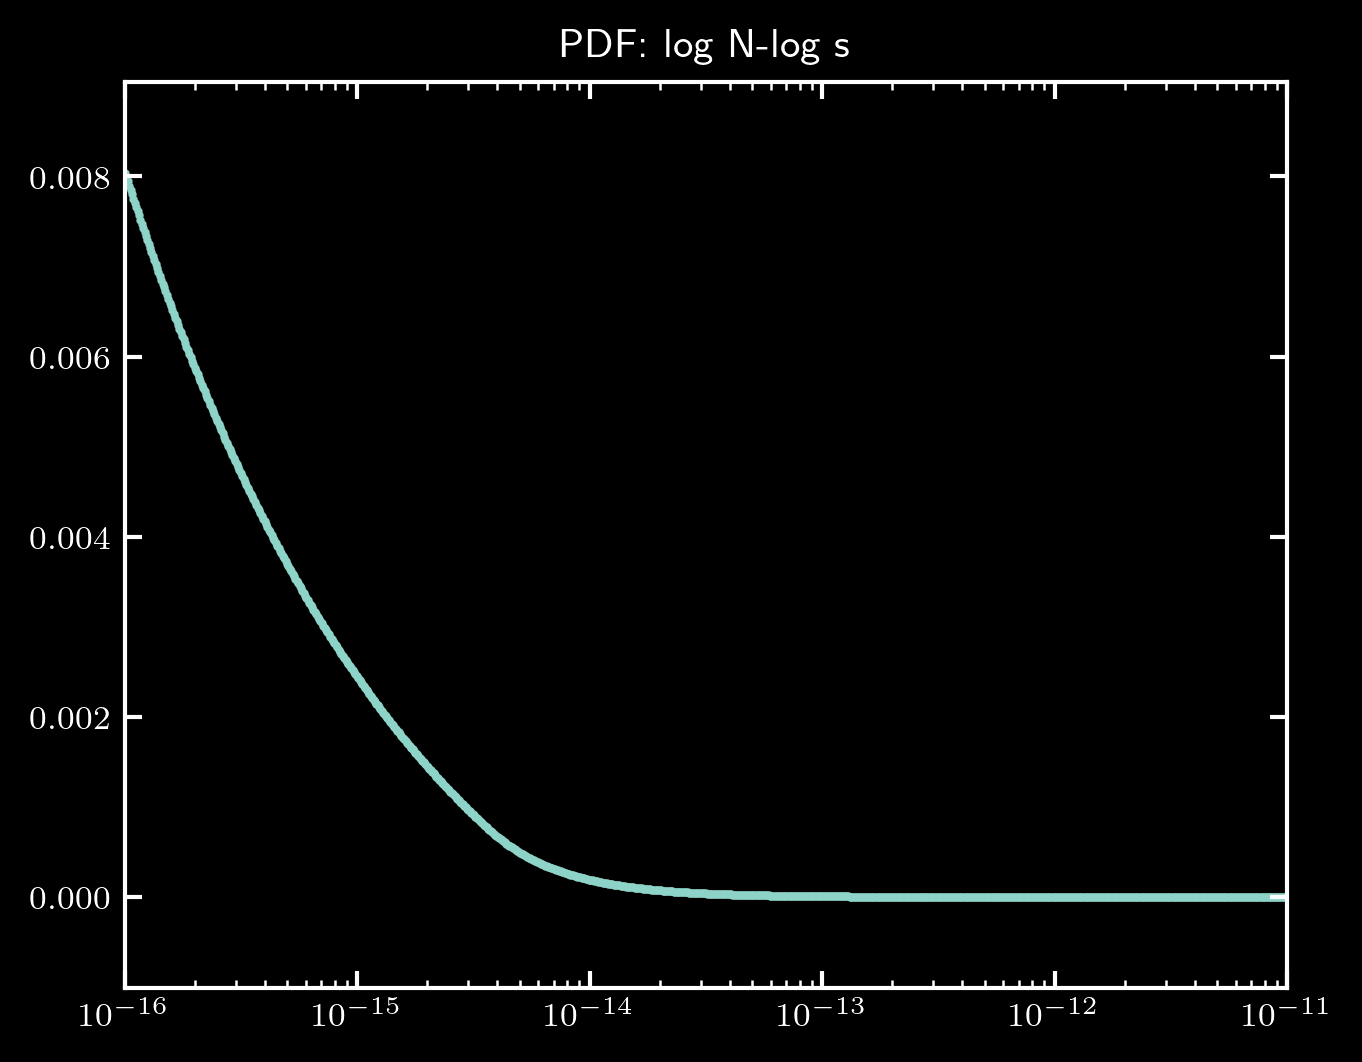

In [404]:
plt.scatter(x_range,pdf, s = 1)
plt.xlim(1e-16,1e-11)
plt.title('PDF: log N-log s')
plt.xscale('log')



In [571]:
pix_scale = 47.1262 / 20 # arcseconds / pixel

rand_img = np.zeros(len(fluxlimit_1d))

rand_src = 460

if (np.sum(rand_img[460:460+4])==0) and (np.sum(rand_img[460:460-4])==0):
    print('yes')

no


In [572]:
# Try drawing random image positions from uniform distribution:

# Indices of 500 possible sources
#Say we have 10 sources:
n_data = 10
src_tally = 0
rand_img = np.zeros(len(fluxlimit_1d))

while src_tally < 100*n_data:
    rand_src = np.random.randint(0,1000**2,1)[0]
    rand_flux = np.random.choice(x_range, 1, p=pdf)
    
    
    #check to make sure drawn source not inside another source's psf:
    # swft psf = 18"; check to see if source within 4 pixels of another
    
    if (np.sum(rand_img[rand_src:rand_src+4])==0) and (np.sum(rand_img[rand_src:rand_src-4]) == 0):
    
        # check flux of draw to fluxlimit of associated pixel
        
        if rand_flux >= fluxlimit_1d[rand_src]:
        
            # Update value 
            rand_img[rand_src] = rand_flux 
        
            # tally 
            src_tally += 1
            print(src_tally)
print(str(src_tally) + " source generated for this field")
        






1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [573]:
len((np.reshape(rand_img, (1000,1000))[np.reshape(rand_img, (1000,1000))>0]))


1000

87

In [523]:
# Infer indices of surviving sources 
ndim = 1000
rand_img = np.zeros(len(fluxlimit_1d))

# Update values from flux draw:
for i in range(0,len(rand_src_check)):
    pixel = rand_src_check[i]
    flux = rand_flux_check[i]
    rand_img[pixel] = flux
#rand_img_2 =  np.reshape(a_1d_array, (-1, 2))

In [574]:
rand_img_2d =  np.reshape(rand_img, (ndim, ndim))
# Row: img[i,:]
# column: img[:,j]

In [575]:
vals = np.where(rand_img_2d > 0)
yvals = vals[0]
xvals = vals[1]
fluxes = rand_img[rand_img>0]


In [535]:
from matplotlib import colors

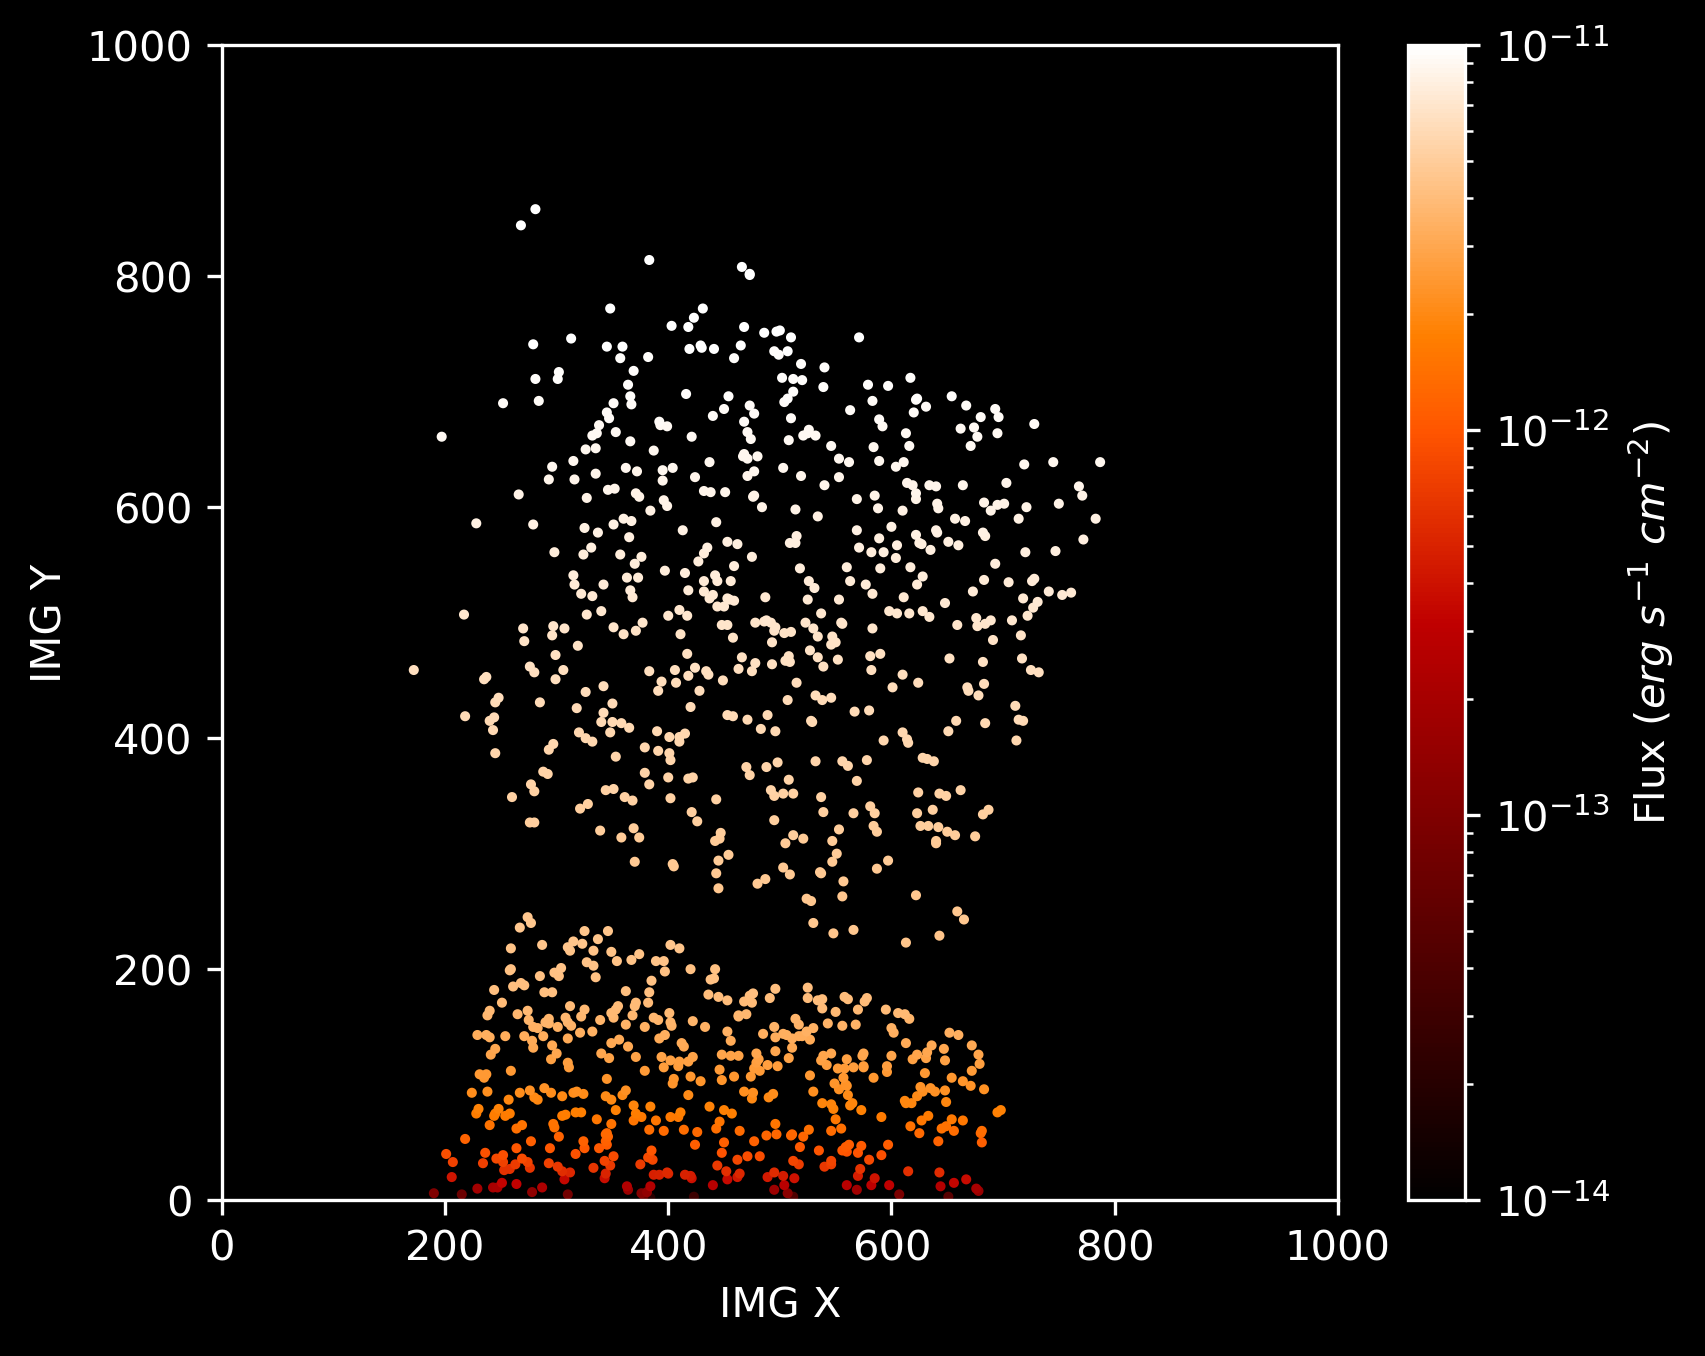

In [634]:
#plt.scatter(xvals,yvals,s = 1)
plt.style.use('dark_background')
plt.figure(figsize = [6,5],dpi = 300)
plt.ylim(0,1000)
plt.xlim(0,1000)
color = np.linspace(1e-14,1e-11,len(xvals))
plt.scatter(xvals,yvals, s = 2, c = color, cmap = 'gist_heat',vmin = 1e-14, vmax = 1e-11, norm=colors.LogNorm())
plt.colorbar(label = "Flux " + r'$(erg \ s^{-1} \ cm^{-2})$')
plt.ylabel('IMG Y')
plt.xlabel('IMG X')
plt.savefig('/Users/bbonine/ou/general_exam/figs/rand_img.png')


Text(0.5, 0, 'Exposure Map Value')

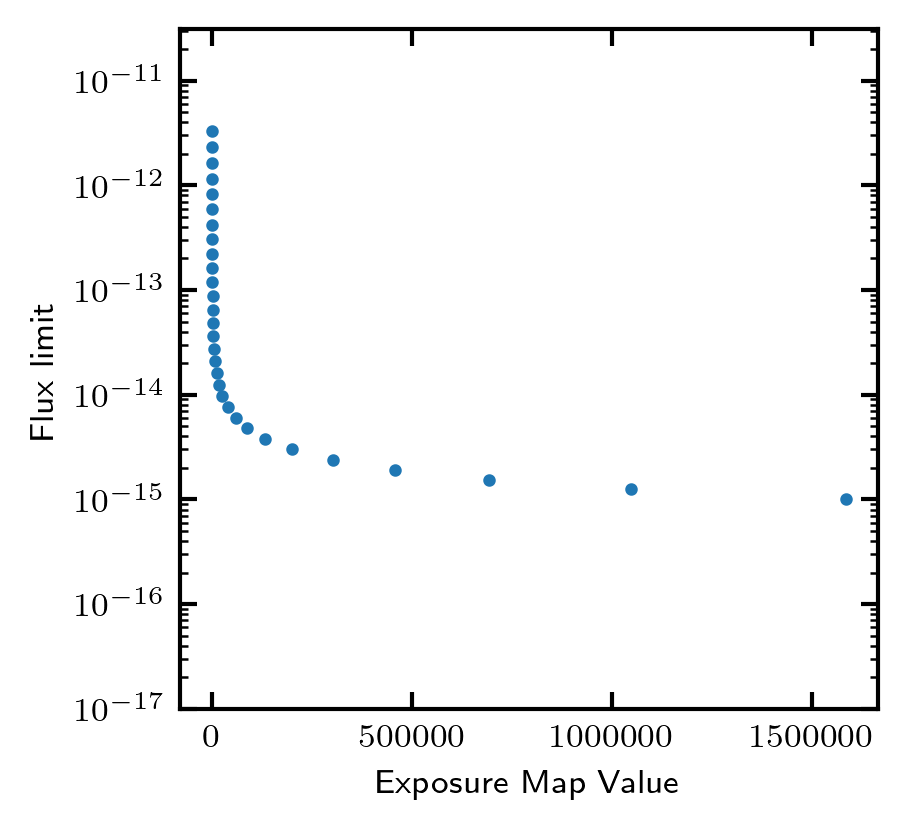

In [264]:
plt.scatter(exp,fluxlim,s = 4)

plt.yscale('log')
plt.ylim(1e-17,3.1e-11)

plt.ylabel('Flux limit')
plt.xlabel('Exposure Map Value')

In [270]:
from scipy.interpolate import interp1d
func1 = interp1d(exp,fluxlim, fill_value = "extrapolate")

In [274]:
flux_limit_test = np.zeros(len(exp_map_1d))
for i in range(0,len(exp_map_1d)):
    flux_limit_test[i] = func1(exp_map_1d[i])
    

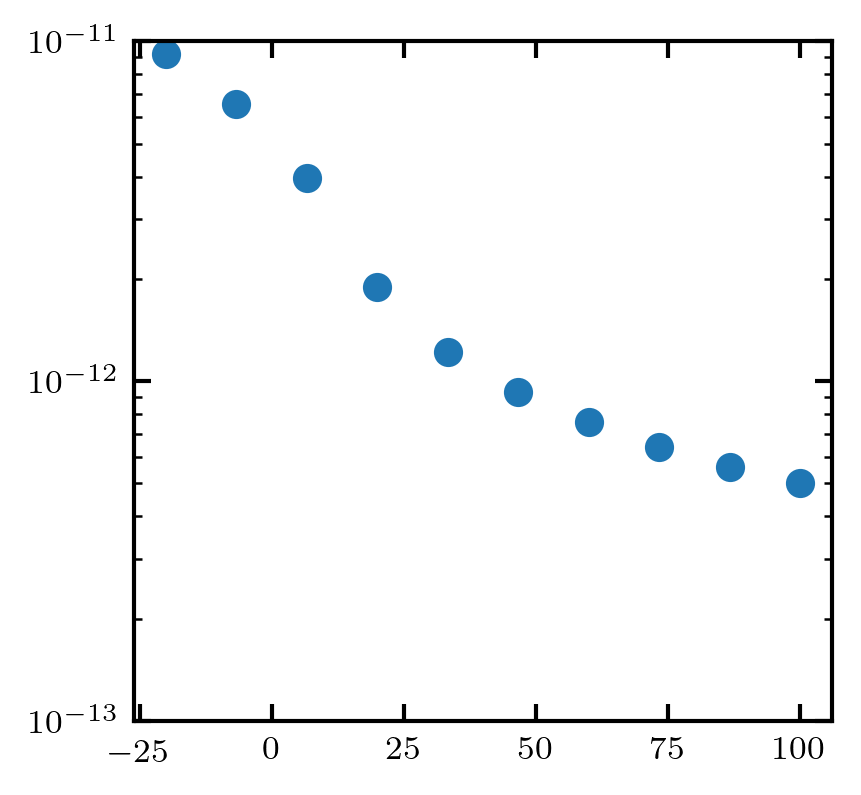

In [308]:
x = np.linspace(-20,100, 10)
y = np.zeros(len(x))
plt.scatter(x,func1(x))
plt.ylim(1e-13,1e-11)
plt.yscale('log')

In [653]:
# Try reading in soft band data
# Read in AGN table:
path = '/Users/bbonine/ou/research/corr_func/data/'
# Remote version: cat = "/home/bonine/donnajean/research/agn_corr/data/agntable_total.txt"
cat = path + 'agntable_total.txt'
field = np.loadtxt(cat, dtype = str,delimiter = None, skiprows = 1, usecols=(15) , unpack = True)
ra,dec,x,y = np.loadtxt(cat, delimiter = None, skiprows = 1, usecols=(2,4,16,17) , unpack = True)


In [689]:
cat_soft = path + 'agntable_soft.txt'
ra_soft, ra_err, dec_soft, dec_err = np.loadtxt(cat_soft, delimiter = None, skiprows = 0, usecols=(2,3,4,5) , unpack = True)

In [655]:
# Match total sources to softband:
x_new = x[ra == ra_soft]

/Users/bbonine/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  


In [669]:
n = min(len(ra), len(ra_soft))
out_idx = np.flatnonzero(ra[:n] == ra_soft[:n])

In [707]:
len(ra_soft)
test = ra[:17748]
test[-6],ra_soft[-1]

(286.6407, 359.9933)

In [696]:
ra[(ra_soft-ra_err <= ra) and (ra < ra_soft+ra_err)]


ValueError: operands could not be broadcast together with shapes (17748,) (22563,) 

In [770]:
x_vals = np.zeros(len(ra_soft))
matches = 0

# Loop through all 22,000 AGN
for i in range(0,len(ra)):
    val = ra[i]
    print(val)
    # For each value in total table, check every value in soft table.
    for j in range(0,len(ra_soft)):
        ra_min = ra_soft[j] - ra_err[j]
        ra_max = ra_soft[j] + ra_err[j]
        
        # value within range, record position
        if val >= ra_min and val <= ra_max:
            x_vals[j] = x[i]
            matches += 1
            print("Matches: " + str(matches))
        
        
            

            
        
       
        

0.0082
0.0149
Matches: 1
0.0155
0.0208
0.039
Matches: 2
0.0427
0.0613
0.0748
0.0803
0.0877
Matches: 3
0.0925
0.1008
Matches: 4
0.1035
Matches: 5
0.1117
0.1145
Matches: 6
0.1182
Matches: 7
0.1216
0.1381
Matches: 8
0.1506
Matches: 9
0.1598
Matches: 10
0.1601
0.1633
Matches: 11
0.166
Matches: 12
0.171
0.1729
0.1787
0.1817
Matches: 13
0.1858
Matches: 14
0.1869
0.1877
0.2122
0.2125
0.2177
0.2255
0.2276
0.2277
0.2311
Matches: 15
0.2334
Matches: 16
0.2339
0.2467
Matches: 17
0.2544
0.2544
0.2545
0.2587
Matches: 18
0.2651
0.2662
0.2695
Matches: 19
0.2809
Matches: 20
0.2895
0.2922
Matches: 21
0.3016
0.3061
Matches: 22
0.309
Matches: 23
0.3184
Matches: 24
Matches: 25
0.3185
Matches: 26
Matches: 27
0.3228
Matches: 28
0.3249
Matches: 29
0.3252
Matches: 30
0.327
0.3388
0.3394
Matches: 31
0.353
0.357
0.3725
Matches: 32
Matches: 33
0.3765
0.3908
Matches: 34
0.4298
0.4383
0.5004
0.5303
0.57
Matches: 35
0.5971
0.6039
0.6114
0.6188
Matches: 36
0.6269
0.6442
Matches: 37
0.6505
0.6507
0.6583
Matches: 38
0.

6.9269
6.9365
Matches: 330
6.9388
6.9428
Matches: 331
6.9475
6.9487
6.9506
6.9568
6.9652
6.9661
Matches: 332
6.9693
6.9694
Matches: 333
6.9694
Matches: 334
6.9713
6.9715
6.9817
6.9826
Matches: 335
6.9885
Matches: 336
6.9943
Matches: 337
Matches: 338
6.9944
Matches: 339
Matches: 340
7.0007
Matches: 341
7.001
Matches: 342
7.0017
Matches: 343
7.0033
Matches: 344
7.0051
Matches: 345
Matches: 346
Matches: 347
7.006
Matches: 348
7.0064
Matches: 349
7.0128
7.0254
Matches: 350
Matches: 351
7.0262
7.0454
Matches: 352
7.0459
7.0477
Matches: 353
7.051
Matches: 354
7.0591
7.0717
Matches: 355
7.076
7.1077
7.1097
Matches: 356
7.1121
7.1143
Matches: 357
7.1223
7.1449
7.1528
7.1886
Matches: 358
7.1938
7.2122
7.2152
Matches: 359
7.219
7.2226
7.2929
7.3613
7.3871
Matches: 360
7.6381
7.6401
Matches: 361
7.6445
7.6683
7.6727
7.6773
7.6829
7.6978
7.7067
Matches: 362
7.7224
7.7247
7.7318
7.7319
7.732
Matches: 363
7.7447
7.745
Matches: 364
7.7483
7.7543
7.7586
Matches: 365
7.77
Matches: 366
7.7902
Matches: 3

13.3709
13.384
13.4569
13.4768
Matches: 640
13.4791
Matches: 641
13.4797
Matches: 642
13.4991
13.5245
Matches: 643
13.5599
Matches: 644
13.5692
13.5759
13.5776
Matches: 645
13.5855
13.5888
13.5913
Matches: 646
13.5941
13.5957
13.6063
Matches: 647
13.6149
Matches: 648
13.6222
13.6236
Matches: 649
13.6271
Matches: 650
13.642
Matches: 651
13.6521
13.6587
13.6593
Matches: 652
Matches: 653
13.6698
13.6783
13.6785
13.6843
Matches: 654
Matches: 655
13.6845
Matches: 656
13.685
13.6867
13.6902
13.6909
13.6917
Matches: 657
13.6973
13.6977
Matches: 658
13.7549
Matches: 659
13.7571
Matches: 660
13.7614
13.7621
Matches: 661
Matches: 662
13.7622
Matches: 663
13.765
13.7679
13.7717
Matches: 664
13.7753
13.7811
Matches: 665
13.7893
13.7961
13.8019
13.8031
13.8031
13.8087
Matches: 666
13.8089
Matches: 667
13.8116
Matches: 668
13.8186
Matches: 669
Matches: 670
13.8187
Matches: 671
Matches: 672
13.8191
Matches: 673
13.838
Matches: 674
13.8429
13.8468
13.8492
13.8574
Matches: 675
13.8678
13.8874
Matches: 

22.5485
22.5496
Matches: 936
22.5498
Matches: 937
Matches: 938
22.5543
Matches: 939
22.5552
22.5567
22.5578
22.5638
Matches: 940
22.5639
Matches: 941
22.5644
22.5709
22.5715
22.5727
22.5734
Matches: 942
Matches: 943
22.5749
Matches: 944
22.576
22.5771
Matches: 945
22.5812
Matches: 946
22.5938
Matches: 947
22.5969
Matches: 948
Matches: 949
22.5974
22.599
Matches: 950
22.5993
Matches: 951
22.6049
Matches: 952
22.6078
22.6085
Matches: 953
Matches: 954
22.6089
Matches: 955
22.6093
Matches: 956
Matches: 957
Matches: 958
Matches: 959
22.6098
Matches: 960
22.6101
22.6103
22.6177
Matches: 961
22.6194
Matches: 962
22.6234
Matches: 963
22.6248
22.6251
Matches: 964
22.6271
22.6276
Matches: 965
22.634
22.6359
Matches: 966
22.6398
22.6408
Matches: 967
22.6413
22.6421
Matches: 968
22.6424
Matches: 969
22.6499
Matches: 970
Matches: 971
Matches: 972
22.65
Matches: 973
Matches: 974
22.6504
Matches: 975
Matches: 976
Matches: 977
22.6507
Matches: 978
22.6508
22.6522
22.6529
Matches: 979
22.6536
22.6557
M

29.4891
29.5006
29.5032
29.5067
Matches: 1238
29.5362
29.5421
Matches: 1239
29.554
Matches: 1240
29.5723
29.5933
Matches: 1241
29.5953
Matches: 1242
29.599
Matches: 1243
29.6061
29.6121
29.6295
Matches: 1244
29.6327
29.6393
Matches: 1245
29.6483
29.6521
Matches: 1246
29.6531
Matches: 1247
29.7042
29.71
Matches: 1248
29.7187
29.7198
Matches: 1249
29.7207
Matches: 1250
29.7331
Matches: 1251
29.7385
29.7979
Matches: 1252
29.8099
29.8262
Matches: 1253
29.8422
Matches: 1254
29.8459
29.849
Matches: 1255
Matches: 1256
29.8694
Matches: 1257
29.8823
29.8942
Matches: 1258
29.8951
Matches: 1259
29.9422
29.951
Matches: 1260
29.9524
29.9673
Matches: 1261
29.9841
30.0118
Matches: 1262
30.0162
30.026
30.0367
30.0503
Matches: 1263
30.0574
Matches: 1264
30.0656
30.073
Matches: 1265
30.0807
Matches: 1266
30.0822
Matches: 1267
30.0889
30.0974
30.1034
Matches: 1268
30.1127
30.1146
Matches: 1269
30.1163
Matches: 1270
30.1277
30.1325
30.1409
Matches: 1271
30.141
Matches: 1272
30.1644
30.1915
30.2037
Matches

34.5317
34.5439
34.551
34.5532
34.5571
Matches: 1541
34.5648
34.5878
Matches: 1542
34.5951
Matches: 1543
34.6071
Matches: 1544
34.621
Matches: 1545
34.623
Matches: 1546
34.6361
Matches: 1547
34.6424
34.6479
Matches: 1548
34.6526
34.6597
Matches: 1549
34.6762
Matches: 1550
34.6894
Matches: 1551
34.7583
34.7809
Matches: 1552
34.7888
34.8892
Matches: 1553
34.965
34.9907
34.9943
35.1306
35.3633
Matches: 1554
35.3746
Matches: 1555
35.3828
35.386
35.4047
Matches: 1556
35.4293
35.4567
35.4735
Matches: 1557
35.4812
35.5227
35.5704
35.5939
Matches: 1558
35.6106
35.6198
35.627
35.6305
Matches: 1559
35.6418
Matches: 1560
35.649
Matches: 1561
35.6647
35.6761
Matches: 1562
35.6766
Matches: 1563
35.681
Matches: 1564
35.6987
Matches: 1565
35.7009
Matches: 1566
35.7076
35.7135
Matches: 1567
35.7143
Matches: 1568
35.7317
Matches: 1569
35.7326
Matches: 1570
35.7353
Matches: 1571
35.7434
Matches: 1572
Matches: 1573
35.7434
Matches: 1574
Matches: 1575
35.7439
Matches: 1576
Matches: 1577
35.7539
Matches: 1

40.709
40.713
Matches: 1837
40.7245
40.7516
40.7621
40.769
Matches: 1838
40.7928
40.7975
Matches: 1839
40.7988
40.8045
Matches: 1840
40.811
Matches: 1841
40.8275
40.8294
Matches: 1842
40.8364
40.8398
40.8447
Matches: 1843
40.8472
40.8494
40.8546
40.8584
40.8615
Matches: 1844
Matches: 1845
40.8618
Matches: 1846
Matches: 1847
40.862
Matches: 1848
40.87
Matches: 1849
40.8737
40.8782
40.8857
40.9025
Matches: 1850
40.9101
40.912
40.9169
40.9235
40.9263
40.9279
40.9293
40.9305
Matches: 1851
Matches: 1852
40.94
40.9488
Matches: 1853
40.9489
Matches: 1854
40.9558
Matches: 1855
40.9566
Matches: 1856
40.9575
Matches: 1857
40.9596
40.9657
40.967
40.9762
40.9813
40.9872
Matches: 1858
Matches: 1859
41.0007
41.0014
41.0028
Matches: 1860
Matches: 1861
41.0031
Matches: 1862
Matches: 1863
41.0095
Matches: 1864
41.0104
41.0118
Matches: 1865
41.013
Matches: 1866
41.0204
Matches: 1867
41.022
Matches: 1868
41.0283
Matches: 1869
41.0353
Matches: 1870
41.0536
41.0553
41.0611
41.0704
Matches: 1871
41.0802
41.

48.7345
Matches: 2120
Matches: 2121
48.735
Matches: 2122
48.7479
48.7524
48.7606
48.7669
48.7694
Matches: 2123
48.7794
Matches: 2124
48.7798
Matches: 2125
48.7911
48.8083
48.8224
Matches: 2126
48.8267
Matches: 2127
48.8374
Matches: 2128
48.8508
48.8831
Matches: 2129
49.4906
Matches: 2130
49.52
Matches: 2131
49.5401
Matches: 2132
49.5403
Matches: 2133
49.548
Matches: 2134
49.5902
49.6062
49.6085
Matches: 2135
49.6116
49.6267
49.631
49.6319
Matches: 2136
49.6359
Matches: 2137
49.6553
49.662
49.6722
Matches: 2138
49.6761
Matches: 2139
49.6943
Matches: 2140
49.7132
Matches: 2141
49.7455
49.7501
49.7529
Matches: 2142
49.7557
49.7675
49.8655
Matches: 2143
49.8695
Matches: 2144
49.9021
Matches: 2145
49.9056
49.9063
49.9219
Matches: 2146
49.9437
49.9727
Matches: 2147
49.9833
50.0124
50.0368
50.0509
50.2105
50.2278
Matches: 2148
50.2336
50.2532
50.2535
Matches: 2149
50.2591
Matches: 2150
50.2844
Matches: 2151
50.2924
50.2974
50.2987
Matches: 2152
50.2993
Matches: 2153
50.2997
50.3062
Matches: 2

58.3394
Matches: 2413
Matches: 2414
58.3402
58.3437
58.3526
58.3633
58.3688
Matches: 2415
58.3741
Matches: 2416
58.3757
Matches: 2417
58.377
Matches: 2418
58.3816
Matches: 2419
58.3888
58.3896
Matches: 2420
58.3902
58.4006
58.4028
Matches: 2421
58.4115
Matches: 2422
58.4127
58.4217
Matches: 2423
58.4226
Matches: 2424
58.4272
58.4331
58.4344
58.4461
Matches: 2425
Matches: 2426
58.4462
Matches: 2427
Matches: 2428
58.4509
58.4601
58.4617
Matches: 2429
58.4709
Matches: 2430
58.4736
Matches: 2431
58.4793
58.4835
58.4901
58.4928
58.4974
Matches: 2432
58.5103
Matches: 2433
58.5368
Matches: 2434
58.5483
58.5495
58.6777
Matches: 2435
58.7032
58.711
58.7274
58.8285
58.8639
59.0068
59.0452
59.8522
Matches: 2436
59.8672
Matches: 2437
59.8835
59.8937
59.8969
59.914
59.9233
Matches: 2438
59.9447
59.9506
Matches: 2439
59.9745
Matches: 2440
59.9828
Matches: 2441
59.9861
Matches: 2442
60.0025
Matches: 2443
60.004
Matches: 2444
60.0046
Matches: 2445
60.0047
Matches: 2446
60.0152
Matches: 2447
60.0179
Ma

67.2146
67.2426
67.6794
67.7647
Matches: 2700
67.797
67.8261
67.8282
Matches: 2701
67.8389
67.9429
67.9441
Matches: 2702
67.9655
67.9674
Matches: 2703
67.987
68.0516
68.7824
Matches: 2704
68.8032
68.8141
Matches: 2705
68.8208
68.8215
68.8279
68.8309
68.8475
68.8485
68.849
68.8583
68.8645
68.8685
68.8786
68.8879
68.8915
68.8936
Matches: 2706
68.8966
Matches: 2707
68.9009
68.9091
68.9092
Matches: 2708
68.9154
68.9188
68.9231
68.9265
Matches: 2709
68.9276
68.9417
68.944
68.9471
68.9482
68.9507
68.9541
Matches: 2710
68.958
68.959
68.9628
68.9638
68.9736
68.9812
68.983
Matches: 2711
68.9887
Matches: 2712
68.9954
Matches: 2713
68.9956
Matches: 2714
69.0148
69.0157
Matches: 2715
69.0183
Matches: 2716
69.0261
69.0281
69.032
69.0449
69.0459
69.0513
69.0548
Matches: 2717
69.0578
Matches: 2718
69.0584
69.0602
69.068
Matches: 2719
Matches: 2720
69.0682
Matches: 2721
Matches: 2722
69.0726
69.0849
Matches: 2723
Matches: 2724
69.0849
Matches: 2725
Matches: 2726
69.0854
69.0911
69.0935
Matches: 2727
6

82.4054
Matches: 2975
82.4233
82.4325
Matches: 2976
82.4442
82.4471
Matches: 2977
82.4483
Matches: 2978
82.4501
Matches: 2979
82.4578
Matches: 2980
82.4682
82.4834
Matches: 2981
82.4856
Matches: 2982
82.495
82.4959
82.5051
Matches: 2983
82.555
Matches: 2984
82.5552
Matches: 2985
82.5617
82.5711
Matches: 2986
82.5805
Matches: 2987
82.5942
82.6132
82.6134
Matches: 2988
82.6255
Matches: 2989
82.6376
82.6577
Matches: 2990
82.6624
82.666
82.6791
Matches: 2991
82.6934
Matches: 2992
82.7079
82.7103
82.7113
82.7124
Matches: 2993
82.719
Matches: 2994
82.7192
Matches: 2995
82.7422
82.7427
82.7584
Matches: 2996
82.7652
Matches: 2997
82.7779
Matches: 2998
Matches: 2999
82.7815
82.7889
82.7988
82.8808
Matches: 3000
82.8963
Matches: 3001
82.9565
Matches: 3002
82.9781
82.9914
Matches: 3003
82.998
83.009
83.0167
83.0514
Matches: 3004
83.0715
83.0845
Matches: 3005
83.1286
83.1487
83.1603
Matches: 3006
83.2082
Matches: 3007
83.2157
Matches: 3008
83.2452
Matches: 3009
83.2541
83.2726
Matches: 3010
83.311

Matches: 3253
90.2381
Matches: 3254
90.2405
90.2414
Matches: 3255
90.2621
90.2723
Matches: 3256
90.2755
90.2869
Matches: 3257
90.2887
Matches: 3258
90.3199
90.3207
Matches: 3259
Matches: 3260
90.3219
Matches: 3261
90.3249
Matches: 3262
90.3306
90.3526
Matches: 3263
90.3665
90.383
Matches: 3264
Matches: 3265
90.3864
Matches: 3266
90.3938
90.4103
90.4215
90.4327
Matches: 3267
90.4511
90.4597
Matches: 3268
90.4624
90.4646
Matches: 3269
Matches: 3270
90.4653
90.4683
Matches: 3271
90.478
Matches: 3272
90.4803
Matches: 3273
90.4816
90.4887
Matches: 3274
90.492
Matches: 3275
90.4924
Matches: 3276
Matches: 3277
90.4929
Matches: 3278
Matches: 3279
90.4955
Matches: 3280
90.5194
90.5226
90.526
Matches: 3281
90.5437
90.5595
Matches: 3282
90.5623
Matches: 3283
90.5623
Matches: 3284
90.5732
90.589
Matches: 3285
Matches: 3286
90.5894
Matches: 3287
Matches: 3288
90.5897
90.5948
Matches: 3289
90.6014
Matches: 3290
90.6106
Matches: 3291
90.6147
Matches: 3292
90.6171
Matches: 3293
90.6176
Matches: 3294
M

97.9636
97.9715
Matches: 3555
97.9822
98.0085
98.01
98.0416
98.0511
98.0521
98.0711
Matches: 3556
98.0737
Matches: 3557
98.0738
Matches: 3558
98.0746
Matches: 3559
98.0933
Matches: 3560
98.0964
Matches: 3561
98.1013
Matches: 3562
98.1087
98.1189
98.1265
98.1378
Matches: 3563
98.1412
98.142
98.1562
Matches: 3564
98.1581
98.1868
98.2287
Matches: 3565
98.2719
98.3016
Matches: 3566
98.312
98.3133
98.3194
98.3248
98.3539
98.4476
98.4545
98.471
98.5152
98.5586
98.6329
99.2392
Matches: 3567
99.2639
Matches: 3568
99.2902
Matches: 3569
99.3167
Matches: 3570
99.3429
Matches: 3571
99.3742
Matches: 3572
99.3937
99.4342
Matches: 3573
99.4366
99.5134
Matches: 3574
99.5182
99.5194
99.5236
99.6016
100.0361
Matches: 3575
100.0771
Matches: 3576
100.1679
100.2435
100.3275
Matches: 3577
100.3854
100.4195
100.4437
100.4984
Matches: 3578
100.5153
Matches: 3579
Matches: 3580
100.5158
Matches: 3581
Matches: 3582
100.5423
100.5956
100.6104
100.6236
100.6778
Matches: 3583
100.6839
100.7046
Matches: 3584
100.721

112.2083
112.21
Matches: 3826
112.216
Matches: 3827
112.2161
Matches: 3828
112.2308
112.2312
112.2455
112.2624
112.2678
Matches: 3829
112.2911
Matches: 3830
112.3015
112.3193
112.3194
112.3234
112.3352
112.3537
Matches: 3831
112.372
112.3806
Matches: 3832
112.3843
112.3901
Matches: 3833
112.4026
112.4286
Matches: 3834
112.4313
112.4366
112.44
112.4438
Matches: 3835
112.4477
Matches: 3836
112.4559
112.4575
Matches: 3837
112.4579
Matches: 3838
112.4742
112.4798
112.5257
112.5265
Matches: 3839
Matches: 3840
112.5324
Matches: 3841
112.5519
Matches: 3842
112.5554
112.5866
Matches: 3843
112.5998
112.6017
112.6105
Matches: 3844
112.6309
112.6385
Matches: 3845
112.6423
112.6459
Matches: 3846
112.7498
Matches: 3847
112.7948
112.7965
112.804
112.8276
112.8371
112.8503
112.8543
112.8691
112.8953
Matches: 3848
112.9121
112.919
112.943
Matches: 3849
113.0002
113.064
114.4546
114.5834
114.6018
114.6599
114.6647
Matches: 3850
114.6725
115.1651
115.2085
115.2093
Matches: 3851
115.218
Matches: 3852
115

121.2966
121.2978
Matches: 4103
Matches: 4104
Matches: 4105
121.307
Matches: 4106
121.3222
Matches: 4107
121.3295
Matches: 4108
121.3349
121.3441
121.3513
Matches: 4109
121.3528
121.3545
121.3788
121.3789
121.4004
Matches: 4110
121.4218
Matches: 4111
121.4283
121.4293
Matches: 4112
121.5011
121.5502
121.5727
121.588
121.6029
121.7178
121.7179
Matches: 4113
121.7203
121.7362
121.7415
Matches: 4114
121.7519
Matches: 4115
121.7536
Matches: 4116
121.7719
Matches: 4117
121.772
Matches: 4118
121.775
Matches: 4119
121.7795
Matches: 4120
121.7824
121.7869
121.7878
Matches: 4121
121.7932
121.8007
Matches: 4122
121.8257
Matches: 4123
121.8292
Matches: 4124
121.8349
121.8367
121.8384
Matches: 4125
121.8418
121.8607
121.8615
Matches: 4126
121.8627
121.8717
121.8721
121.8741
121.8802
121.9131
121.9154
121.92
Matches: 4127
121.9227
Matches: 4128
Matches: 4129
121.9227
Matches: 4130
Matches: 4131
121.9254
121.9268
121.9277
Matches: 4132
Matches: 4133
121.9316
Matches: 4134
121.9322
Matches: 4135
121.

Matches: 4367
129.841
Matches: 4368
Matches: 4369
129.8419
Matches: 4370
129.8446
Matches: 4371
Matches: 4372
129.8484
Matches: 4373
Matches: 4374
129.851
Matches: 4375
129.8525
Matches: 4376
129.8684
129.871
129.8742
Matches: 4377
129.8776
129.9127
129.9288
129.9437
Matches: 4378
129.9582
Matches: 4379
129.9808
Matches: 4380
129.992
129.9938
130.0001
130.0058
Matches: 4381
130.0313
Matches: 4382
130.5887
131.0658
131.3739
Matches: 4383
131.8833
131.9022
131.9077
131.9636
131.9682
Matches: 4384
131.9789
Matches: 4385
131.9899
131.9997
Matches: 4386
132.0038
132.0111
Matches: 4387
132.0165
132.0167
132.0202
132.0227
Matches: 4388
Matches: 4389
132.0302
132.0392
132.0492
Matches: 4390
132.0523
Matches: 4391
132.0527
Matches: 4392
132.0557
132.0657
132.0677
132.0816
Matches: 4393
132.0902
Matches: 4394
132.0912
Matches: 4395
132.0927
132.0974
Matches: 4396
132.103
132.1085
132.1131
Matches: 4397
132.1144
132.128
Matches: 4398
132.1312
132.1325
Matches: 4399
Matches: 4400
132.1399
Matches:

136.7571
Matches: 4643
Matches: 4644
136.7606
136.7626
Matches: 4645
136.7673
Matches: 4646
Matches: 4647
136.7714
Matches: 4648
Matches: 4649
Matches: 4650
136.7714
Matches: 4651
Matches: 4652
Matches: 4653
136.7718
Matches: 4654
Matches: 4655
136.7733
Matches: 4656
136.7741
Matches: 4657
Matches: 4658
136.7742
Matches: 4659
Matches: 4660
136.7822
Matches: 4661
136.7904
136.7941
136.7991
136.8031
136.8096
136.8181
Matches: 4662
136.8345
Matches: 4663
136.842
Matches: 4664
136.8432
Matches: 4665
136.8495
Matches: 4666
136.8511
136.8561
136.8574
136.8577
Matches: 4667
136.8593
Matches: 4668
136.86
136.8638
136.8655
Matches: 4669
136.869
Matches: 4670
136.8832
Matches: 4671
136.8943
Matches: 4672
136.9028
Matches: 4673
136.903
Matches: 4674
136.9064
Matches: 4675
136.9077
136.9083
Matches: 4676
136.9116
Matches: 4677
136.9126
Matches: 4678
136.9158
136.9204
Matches: 4679
136.9221
Matches: 4680
136.9256
136.9292
Matches: 4681
136.9295
Matches: 4682
136.9298
136.942
Matches: 4683
136.9511


144.4759
Matches: 4921
144.4766
Matches: 4922
144.4872
144.4899
144.4905
144.4949
144.4993
144.5104
144.5139
144.5247
Matches: 4923
144.5271
Matches: 4924
144.5303
144.5358
Matches: 4925
144.5369
144.5499
144.5534
144.5567
144.5775
Matches: 4926
144.5797
Matches: 4927
144.5855
144.6099
144.6265
144.6389
144.6398
Matches: 4928
144.6546
144.6936
144.9474
144.9506
144.9593
144.961
Matches: 4929
144.9615
Matches: 4930
144.9622
Matches: 4931
144.9733
Matches: 4932
144.975
Matches: 4933
144.9801
144.9856
Matches: 4934
145.0042
145.0078
Matches: 4935
145.0089
Matches: 4936
145.0107
Matches: 4937
145.0114
Matches: 4938
145.0143
Matches: 4939
145.0381
Matches: 4940
145.0389
Matches: 4941
Matches: 4942
145.0394
Matches: 4943
145.042
145.045
145.0516
Matches: 4944
145.0598
Matches: 4945
145.0611
145.0624
Matches: 4946
145.064
145.0652
Matches: 4947
145.0757
145.0766
Matches: 4948
145.08
145.0808
Matches: 4949
Matches: 4950
145.0817
Matches: 4951
145.0837
Matches: 4952
145.084
145.0891
145.0897
14

Matches: 5199
Matches: 5200
150.0412
Matches: 5201
150.044
150.05
150.05
150.0522
150.0545
150.0598
Matches: 5202
150.0625
Matches: 5203
150.0644
150.0668
150.0749
Matches: 5204
150.0843
150.088
150.0913
Matches: 5205
150.0961
150.0989
Matches: 5206
150.099
Matches: 5207
Matches: 5208
150.0993
Matches: 5209
Matches: 5210
150.1069
150.1074
Matches: 5211
150.1195
150.1418
Matches: 5212
150.1457
150.1534
Matches: 5213
150.1549
150.1577
150.1664
150.167
Matches: 5214
150.1678
Matches: 5215
150.1875
Matches: 5216
150.1878
Matches: 5217
150.197
Matches: 5218
150.2158
150.2162
150.2331
150.2366
Matches: 5219
Matches: 5220
150.2386
Matches: 5221
150.2419
Matches: 5222
150.2443
150.2504
Matches: 5223
150.2515
Matches: 5224
150.2563
Matches: 5225
Matches: 5226
150.2565
Matches: 5227
150.2567
150.258
Matches: 5228
150.2702
Matches: 5229
150.2714
150.2765
Matches: 5230
150.2804
150.2814
Matches: 5231
Matches: 5232
150.3024
150.3406
Matches: 5233
150.3476
150.3743
150.3863
Matches: 5234
150.4036
15

163.2885
Matches: 5458
163.2892
Matches: 5459
163.2935
163.3064
163.3225
Matches: 5460
163.3392
163.3479
Matches: 5461
163.3496
Matches: 5462
163.3566
Matches: 5463
163.3585
163.3585
163.3862
Matches: 5464
163.4008
163.4025
163.4031
163.4037
163.4417
Matches: 5465
163.4462
Matches: 5466
163.4505
Matches: 5467
163.4606
163.4681
163.4712
163.4811
163.4835
163.4897
Matches: 5468
163.4944
Matches: 5469
163.5019
163.5324
163.5723
163.5752
163.5822
Matches: 5470
163.5846
Matches: 5471
163.5896
Matches: 5472
163.5926
Matches: 5473
163.5975
163.6245
Matches: 5474
163.6528
163.6545
Matches: 5475
163.7015
163.7251
Matches: 5476
163.7833
163.919
Matches: 5477
164.0012
164.0925
164.1248
164.1627
164.1863
Matches: 5478
164.1954
164.2049
Matches: 5479
164.2123
164.2209
Matches: 5480
164.2278
164.2284
164.2695
Matches: 5481
164.2703
Matches: 5482
164.3016
Matches: 5483
164.3313
164.3485
Matches: 5484
164.3489
Matches: 5485
164.3781
164.3817
Matches: 5486
164.394
164.4258
164.4273
164.439
164.4403
164

169.7834
169.7837
169.7842
Matches: 5740
169.7891
169.8047
169.8103
169.8307
Matches: 5741
169.8406
169.8978
170.671
170.6791
Matches: 5742
170.69
Matches: 5743
170.705
Matches: 5744
170.7295
170.741
Matches: 5745
170.749
Matches: 5746
170.7674
Matches: 5747
170.7729
Matches: 5748
170.7821
Matches: 5749
170.7849
170.8252
170.843
Matches: 5750
170.8571
170.8597
Matches: 5751
170.8659
Matches: 5752
Matches: 5753
170.8745
170.906
Matches: 5754
170.9258
Matches: 5755
170.9327
170.9397
Matches: 5756
170.9437
170.963
Matches: 5757
170.9647
Matches: 5758
170.9777
Matches: 5759
170.9942
170.9991
171.0167
Matches: 5760
171.0254
171.0382
Matches: 5761
171.0399
Matches: 5762
171.0564
Matches: 5763
171.0652
Matches: 5764
171.0756
171.0772
171.0843
171.1135
Matches: 5765
171.1145
171.1148
171.1274
171.1319
171.137
171.1437
171.1788
171.1938
171.2013
171.2482
171.2556
171.2602
Matches: 5766
171.265
Matches: 5767
171.2715
171.2853
Matches: 5768
171.2873
171.3581
Matches: 5769
171.3757
171.3808
171.41

177.6343
177.6347
177.6443
177.6483
Matches: 6013
177.6537
177.6546
Matches: 6014
Matches: 6015
Matches: 6016
177.655
Matches: 6017
Matches: 6018
Matches: 6019
177.6662
Matches: 6020
177.6728
177.6824
177.6829
Matches: 6021
177.6863
Matches: 6022
177.69
Matches: 6023
177.6969
Matches: 6024
Matches: 6025
177.6986
177.7056
Matches: 6026
177.7096
Matches: 6027
177.713
177.7185
Matches: 6028
177.7265
Matches: 6029
177.7265
Matches: 6030
177.7305
177.7336
Matches: 6031
177.7348
177.7409
177.7418
Matches: 6032
Matches: 6033
177.7473
177.7557
Matches: 6034
177.769
Matches: 6035
177.7695
177.771
Matches: 6036
177.7713
Matches: 6037
177.773
Matches: 6038
177.7755
Matches: 6039
177.7781
177.7867
Matches: 6040
177.7874
Matches: 6041
177.7895
Matches: 6042
177.7923
Matches: 6043
177.7938
177.7979
Matches: 6044
Matches: 6045
177.8001
Matches: 6046
Matches: 6047
177.8041
Matches: 6048
177.8062
177.8117
177.8147
Matches: 6049
177.815
Matches: 6050
177.817
177.8194
177.8222
Matches: 6051
177.8361
177.

183.6336
183.6375
183.6401
183.6558
Matches: 6282
183.6558
Matches: 6283
183.6574
183.6712
Matches: 6284
183.6717
Matches: 6285
183.6996
Matches: 6286
183.7001
183.715
183.7187
Matches: 6287
183.7416
Matches: 6288
183.7464
Matches: 6289
183.7615
Matches: 6290
183.7778
183.7945
Matches: 6291
183.8109
183.885
183.9086
183.9092
183.918
Matches: 6292
183.9285
Matches: 6293
183.9427
Matches: 6294
183.9447
183.9457
Matches: 6295
183.9491
Matches: 6296
183.9579
Matches: 6297
183.9657
183.9678
Matches: 6298
183.9679
Matches: 6299
Matches: 6300
183.9969
Matches: 6301
Matches: 6302
184.0005
Matches: 6303
184.0008
Matches: 6304
184.0057
Matches: 6305
184.0174
184.0175
184.0215
184.032
Matches: 6306
184.0378
184.0484
Matches: 6307
184.0564
Matches: 6308
Matches: 6309
184.0657
Matches: 6310
184.0665
184.0845
184.0906
184.1022
184.1032
Matches: 6311
184.1084
184.112
184.1121
184.1189
184.1235
184.1404
184.1421
184.1661
184.1859
184.1918
Matches: 6312
184.2031
Matches: 6313
184.2093
Matches: 6314
184

Matches: 6560
Matches: 6561
192.9761
Matches: 6562
Matches: 6563
192.9896
Matches: 6564
192.9966
Matches: 6565
193.0211
193.0263
193.0337
Matches: 6566
193.0492
Matches: 6567
193.0543
193.0692
Matches: 6568
193.0733
Matches: 6569
193.1101
193.1218
193.152
Matches: 6570
193.1649
193.1886
193.1895
193.198
193.2123
193.2199
193.2332
193.2414
Matches: 6571
193.242
Matches: 6572
193.2543
Matches: 6573
193.2641
Matches: 6574
Matches: 6575
193.2906
Matches: 6576
193.2958
193.2976
Matches: 6577
Matches: 6578
193.3059
Matches: 6579
193.3188
193.3374
Matches: 6580
193.3457
193.3503
193.3609
193.366
Matches: 6581
193.3803
Matches: 6582
193.3972
193.398
Matches: 6583
193.4581
193.4955
Matches: 6584
193.497
Matches: 6585
Matches: 6586
193.5802
193.608
Matches: 6587
193.6117
193.6727
193.6802
193.7136
193.7185
193.7446
193.7515
193.7649
193.7712
193.7905
193.8038
193.8098
Matches: 6588
193.8111
193.8241
Matches: 6589
Matches: 6590
Matches: 6591
193.8247
Matches: 6592
Matches: 6593
193.8266
193.8324


Matches: 6835
198.3578
Matches: 6836
198.3592
Matches: 6837
198.3625
Matches: 6838
198.3761
Matches: 6839
198.3818
198.3855
Matches: 6840
198.4058
198.4115
Matches: 6841
198.4182
Matches: 6842
198.4265
198.4501
Matches: 6843
198.4606
198.4703
198.471
198.4728
Matches: 6844
198.4738
198.4756
Matches: 6845
198.4795
Matches: 6846
198.4899
198.5072
Matches: 6847
198.5204
198.5258
Matches: 6848
198.5277
198.5365
Matches: 6849
198.5431
198.545
Matches: 6850
198.5594
Matches: 6851
198.5982
Matches: 6852
198.7348
198.7684
Matches: 6853
198.7966
Matches: 6854
198.8148
198.8234
198.8249
Matches: 6855
198.8275
198.8372
198.8384
198.8446
198.8515
Matches: 6856
198.8914
198.8946
198.9038
198.9056
198.9109
Matches: 6857
198.9129
Matches: 6858
198.919
Matches: 6859
198.9226
198.9315
198.9565
Matches: 6860
Matches: 6861
198.9565
Matches: 6862
Matches: 6863
198.9567
Matches: 6864
Matches: 6865
198.9574
Matches: 6866
Matches: 6867
198.9583
198.9643
198.9653
Matches: 6868
Matches: 6869
198.9831
Matches: 

Matches: 7106
209.5236
Matches: 7107
209.5279
209.5401
209.5449
Matches: 7108
209.5487
209.5573
Matches: 7109
209.5589
209.5616
209.5677
209.5706
209.5992
Matches: 7110
209.608
209.6138
209.6243
Matches: 7111
209.6353
Matches: 7112
209.6392
209.6503
Matches: 7113
209.6701
209.6845
Matches: 7114
209.727
209.7276
209.7313
Matches: 7115
Matches: 7116
209.7335
209.7413
209.757
209.7672
209.772
209.7736
Matches: 7117
209.7796
Matches: 7118
209.8197
209.8359
209.8434
Matches: 7119
Matches: 7120
209.8445
209.8498
209.8736
209.8745
Matches: 7121
Matches: 7122
209.8772
209.8908
209.9019
Matches: 7123
209.9103
209.9148
Matches: 7124
209.9231
Matches: 7125
210.4133
Matches: 7126
210.4442
Matches: 7127
210.4635
210.4765
210.4875
Matches: 7128
210.523
210.5396
210.5457
Matches: 7129
210.5527
Matches: 7130
210.5604
Matches: 7131
210.5607
Matches: 7132
210.5656
Matches: 7133
210.571
Matches: 7134
210.5787
Matches: 7135
210.5821
210.6063
Matches: 7136
210.6228
Matches: 7137
210.6388
210.6664
Matches: 

219.2934
219.2992
219.3005
Matches: 7370
219.3099
219.311
219.3159
219.3171
Matches: 7371
Matches: 7372
219.3187
219.3192
219.3235
219.3259
219.3348
Matches: 7373
219.3358
219.3377
219.3406
219.3413
219.344
Matches: 7374
219.3498
Matches: 7375
Matches: 7376
219.3508
219.3542
Matches: 7377
219.3604
Matches: 7378
219.3618
219.3624
219.3675
Matches: 7379
219.3709
Matches: 7380
219.3787
Matches: 7381
219.379
Matches: 7382
Matches: 7383
219.3833
Matches: 7384
219.3862
219.3889
219.3944
219.4092
Matches: 7385
219.4264
Matches: 7386
219.4349
Matches: 7387
219.4379
Matches: 7388
219.4417
Matches: 7389
219.4422
219.4586
Matches: 7390
219.4592
219.4621
219.4689
Matches: 7391
219.4734
Matches: 7392
219.4997
Matches: 7393
219.5028
219.5487
219.5524
Matches: 7394
219.5821
219.5852
Matches: 7395
219.6802
219.709
219.7238
219.7246
219.7328
Matches: 7396
219.7404
Matches: 7397
219.7983
Matches: 7398
219.8227
219.8388
219.8729
Matches: 7399
219.8874
219.8911
219.913
219.923
219.9297
Matches: 7400
219.9

227.8782
227.887
227.8891
227.8911
227.9064
Matches: 7642
227.9066
Matches: 7643
227.9091
Matches: 7644
Matches: 7645
227.9187
Matches: 7646
227.9283
Matches: 7647
Matches: 7648
227.9352
Matches: 7649
Matches: 7650
227.9362
Matches: 7651
227.9369
Matches: 7652
227.938
Matches: 7653
227.9431
227.9681
227.9946
227.998
228.0
228.0162
228.0373
228.0386
228.0575
228.0591
228.1046
Matches: 7654
228.1163
228.1406
228.1407
228.1571
228.1738
228.182
228.1827
228.2031
Matches: 7655
228.2122
Matches: 7656
228.222
Matches: 7657
228.2247
228.2425
228.2499
Matches: 7658
228.2506
Matches: 7659
228.2507
Matches: 7660
228.2512
Matches: 7661
Matches: 7662
228.2532
Matches: 7663
228.2596
228.2856
228.2905
Matches: 7664
228.2937
228.2956
Matches: 7665
228.2971
Matches: 7666
Matches: 7667
228.3064
Matches: 7668
Matches: 7669
228.3071
Matches: 7670
Matches: 7671
228.3073
Matches: 7672
Matches: 7673
228.3096
Matches: 7674
228.3118
Matches: 7675
Matches: 7676
228.3126
Matches: 7677
Matches: 7678
228.3273
Matc

236.2868
Matches: 7915
236.3278
236.3282
236.3389
236.3444
236.3531
236.3558
Matches: 7916
236.3698
Matches: 7917
236.3787
236.3816
236.3917
236.3982
Matches: 7918
236.4041
236.4273
236.4284
236.4291
Matches: 7919
236.4425
236.4437
Matches: 7920
236.4671
236.4697
Matches: 7921
236.4757
Matches: 7922
236.476
Matches: 7923
236.4795
236.4994
236.5027
236.5056
236.5069
Matches: 7924
236.537
Matches: 7925
Matches: 7926
236.5376
Matches: 7927
236.5567
236.5706
236.5763
236.5918
Matches: 7928
236.5945
236.5969
236.6525
Matches: 7929
236.7578
236.813
236.8451
236.8551
Matches: 7930
236.8695
Matches: 7931
236.8744
Matches: 7932
Matches: 7933
236.8749
236.8768
Matches: 7934
236.8798
Matches: 7935
236.881
Matches: 7936
236.8823
236.8907
Matches: 7937
236.8946
236.8999
Matches: 7938
236.9148
Matches: 7939
236.9228
Matches: 7940
236.9246
Matches: 7941
236.9359
236.9505
Matches: 7942
236.9646
Matches: 7943
236.9806
236.9815
Matches: 7944
236.9884
236.9907
Matches: 7945
237.003
Matches: 7946
237.0093

241.8569
Matches: 8180
241.8576
241.8668
241.8725
Matches: 8181
241.8744
241.875
Matches: 8182
Matches: 8183
241.8752
Matches: 8184
Matches: 8185
241.8884
Matches: 8186
241.892
241.8966
Matches: 8187
241.8988
241.9044
241.906
Matches: 8188
241.9079
Matches: 8189
241.9082
Matches: 8190
241.9098
241.9099
241.9167
241.9239
Matches: 8191
241.9269
241.9321
241.9327
Matches: 8192
Matches: 8193
241.9385
241.9386
Matches: 8194
241.9416
Matches: 8195
241.9545
Matches: 8196
241.9613
241.969
Matches: 8197
241.9868
241.9901
241.9956
242.012
242.0137
Matches: 8198
242.0268
Matches: 8199
242.0443
242.0595
Matches: 8200
242.0786
Matches: 8201
242.1532
242.1929
Matches: 8202
242.509
242.5109
242.521
Matches: 8203
242.5369
Matches: 8204
242.571
242.593
242.5956
Matches: 8205
242.5996
242.6001
242.6005
Matches: 8206
242.6156
242.6157
242.6571
242.661
242.6691
242.6703
242.6807
Matches: 8207
242.6812
Matches: 8208
242.6907
242.7172
242.7265
Matches: 8209
Matches: 8210
242.7652
242.7682
242.7765
242.7946


252.0005
Matches: 8451
252.0541
Matches: 8452
252.1288
Matches: 8453
252.1462
252.1829
252.1929
Matches: 8454
252.2176
252.2997
Matches: 8455
252.3183
252.3378
Matches: 8456
252.3467
252.363
Matches: 8457
252.378
252.3806
Matches: 8458
252.3944
Matches: 8459
252.395
Matches: 8460
Matches: 8461
252.3964
252.4074
252.4169
Matches: 8462
252.4172
Matches: 8463
252.4285
Matches: 8464
Matches: 8465
252.4291
Matches: 8466
252.43
252.4451
252.4478
252.4556
252.4564
Matches: 8467
252.4626
252.4663
252.4725
252.4871
Matches: 8468
252.4877
Matches: 8469
252.4972
252.5012
Matches: 8470
252.52
Matches: 8471
252.5237
252.5293
Matches: 8472
252.5293
Matches: 8473
252.5364
252.5388
Matches: 8474
252.5478
Matches: 8475
252.5517
252.5667
252.5805
252.5819
252.5837
Matches: 8476
252.586
Matches: 8477
252.5902
Matches: 8478
252.5951
252.5983
252.5991
252.6032
Matches: 8479
252.612
252.641
252.6438
Matches: 8480
Matches: 8481
252.645
252.6528
252.6703
252.6744
252.6761
Matches: 8482
Matches: 8483
252.6769


263.1942
263.1993
263.2072
Matches: 8672
263.2243
263.2355
263.2419
Matches: 8673
263.2492
Matches: 8674
263.2558
Matches: 8675
263.2571
263.2593
263.2708
263.2928
263.2981
Matches: 8676
263.2995
Matches: 8677
263.3004
Matches: 8678
263.3052
263.307
Matches: 8679
263.3097
263.3113
263.3184
263.3239
263.3255
263.3324
Matches: 8680
263.344
263.3554
263.3564
Matches: 8681
263.3574
263.364
263.3728
Matches: 8682
263.3902
263.4043
Matches: 8683
263.4054
263.4144
263.4151
Matches: 8684
263.4164
Matches: 8685
263.42
Matches: 8686
263.4484
263.4553
263.4625
263.4642
Matches: 8687
263.4841
Matches: 8688
263.4847
263.4878
263.4955
Matches: 8689
263.4965
Matches: 8690
263.529
Matches: 8691
263.5461
Matches: 8692
263.5524
263.557
263.56
263.562
263.5678
Matches: 8693
263.5685
263.5757
Matches: 8694
263.5797
Matches: 8695
263.5836
263.5838
263.5844
263.6091
Matches: 8696
263.6165
263.6251
263.6313
263.632
Matches: 8697
263.6434
Matches: 8698
263.6472
Matches: 8699
263.6494
263.6526
263.659
Matches:

273.243
273.244
273.2925
273.2973
273.3117
273.3479
273.3786
273.4409
273.4442
273.4517
273.4779
273.5065
273.5321
Matches: 8899
273.5538
Matches: 8900
273.5588
Matches: 8901
273.5693
273.5715
Matches: 8902
273.5794
273.5919
273.5983
273.6026
Matches: 8903
273.6039
Matches: 8904
Matches: 8905
273.6081
Matches: 8906
273.6115
Matches: 8907
273.6168
273.624
Matches: 8908
273.6317
273.6336
273.6361
Matches: 8909
273.6387
Matches: 8910
273.652
Matches: 8911
273.6597
273.6618
273.6631
273.667
Matches: 8912
273.6765
273.6821
Matches: 8913
273.6852
Matches: 8914
273.6853
Matches: 8915
273.6876
Matches: 8916
Matches: 8917
273.6945
273.7058
273.706
273.7074
Matches: 8918
273.7276
Matches: 8919
273.7285
Matches: 8920
273.7291
Matches: 8921
Matches: 8922
273.7322
Matches: 8923
273.7376
Matches: 8924
273.7425
Matches: 8925
273.7508
Matches: 8926
273.7709
273.7722
Matches: 8927
273.7751
Matches: 8928
273.7786
Matches: 8929
273.7853
273.787
Matches: 8930
273.7893
273.8008
273.8033
Matches: 8931
273.8

279.4279
279.4597
279.4838
279.5302
Matches: 9151
279.5322
Matches: 9152
279.5652
279.6079
279.6196
Matches: 9153
279.6531
279.6542
279.6678
279.6748
279.6865
Matches: 9154
279.6954
279.7058
Matches: 9155
279.7065
279.7223
279.7245
279.7356
Matches: 9156
279.769
279.7747
279.7763
279.7905
Matches: 9157
279.7913
Matches: 9158
Matches: 9159
279.7913
Matches: 9160
Matches: 9161
279.8041
Matches: 9162
279.8341
279.84
279.84
279.854
Matches: 9163
279.8551
Matches: 9164
279.8897
279.893
Matches: 9165
279.905
Matches: 9166
279.9701
279.9709
Matches: 9167
279.9847
279.9899
Matches: 9168
280.0272
280.0392
280.0519
Matches: 9169
280.0625
280.0643
Matches: 9170
280.0722
280.0767
280.0985
280.1256
280.1261
Matches: 9171
280.1413
Matches: 9172
280.1558
Matches: 9173
Matches: 9174
280.1561
Matches: 9175
280.1569
280.1618
Matches: 9176
280.1645
280.1785
280.19
Matches: 9177
280.1938
280.1957
Matches: 9178
280.2114
Matches: 9179
Matches: 9180
280.2117
Matches: 9181
280.2276
Matches: 9182
280.2388
280.

Matches: 9407
289.8349
289.8551
Matches: 9408
289.8576
Matches: 9409
289.8612
289.8641
Matches: 9410
289.8738
289.878
Matches: 9411
289.88
289.8822
Matches: 9412
289.891
Matches: 9413
289.8926
289.9058
289.9168
289.9279
289.9324
289.9416
289.958
289.9592
289.9621
Matches: 9414
289.9653
289.9686
289.9753
289.9762
289.9972
290.0044
290.0119
290.0142
Matches: 9415
290.0245
Matches: 9416
290.0295
Matches: 9417
290.0344
Matches: 9418
290.0458
290.0487
290.0505
Matches: 9419
290.0553
Matches: 9420
290.0576
290.0736
Matches: 9421
290.0792
Matches: 9422
290.0841
Matches: 9423
290.089
290.0944
290.1087
290.1128
290.1188
290.1246
290.1311
Matches: 9424
290.1322
Matches: 9425
290.1348
Matches: 9426
290.1387
290.162
Matches: 9427
290.1692
290.1708
Matches: 9428
290.1817
290.1934
290.2196
Matches: 9429
290.2249
Matches: 9430
290.2413
290.246
290.2517
290.2705
290.2732
290.2922
290.2991
290.3026
Matches: 9431
290.3064
290.3138
290.3354
Matches: 9432
290.3398
Matches: 9433
290.3897
290.4041
Matches: 

299.3721
299.4031
299.4113
299.4127
Matches: 9658
299.5577
299.5582
299.5912
Matches: 9659
299.6188
299.6923
Matches: 9660
Matches: 9661
299.6924
Matches: 9662
Matches: 9663
299.6952
Matches: 9664
299.7018
299.7035
299.7097
Matches: 9665
299.7323
299.7509
299.7597
Matches: 9666
299.7837
299.7848
Matches: 9667
299.7885
Matches: 9668
299.7888
299.8082
299.8102
299.8173
299.8253
299.8498
Matches: 9669
299.8553
Matches: 9670
Matches: 9671
299.874
299.8763
299.8975
299.9031
299.9239
299.9315
299.9603
299.9614
299.978
299.9821
299.9882
299.9968
Matches: 9672
300.0047
Matches: 9673
300.0123
300.0136
Matches: 9674
300.0146
300.0175
300.0189
300.0205
300.0256
Matches: 9675
300.028
300.0337
300.0405
300.0464
Matches: 9676
300.0516
300.0534
300.061
300.0627
300.0678
300.0682
Matches: 9677
300.0699
300.0768
300.079
Matches: 9678
300.0925
Matches: 9679
300.0957
300.0962
Matches: 9680
300.098
Matches: 9681
300.0989
300.0997
300.1045
Matches: 9682
300.1048
Matches: 9683
Matches: 9684
300.112
Matches:

309.0778
Matches: 9903
309.0911
309.1045
Matches: 9904
309.1128
Matches: 9905
309.1285
309.1484
309.1515
Matches: 9906
309.1519
309.1674
Matches: 9907
309.1862
309.1982
309.1987
Matches: 9908
309.218
309.2244
309.2254
Matches: 9909
309.2299
309.2304
309.2352
Matches: 9910
309.2357
309.2443
Matches: 9911
309.2533
309.2655
309.2826
Matches: 9912
Matches: 9913
309.2832
309.2854
Matches: 9914
309.2884
309.3039
Matches: 9915
309.3133
309.3175
309.335
309.3373
Matches: 9916
309.342
309.3463
Matches: 9917
309.369
309.3808
309.4003
309.4049
Matches: 9918
309.4147
Matches: 9919
309.4291
309.4571
309.4923
310.1299
310.2446
310.2924
Matches: 9920
310.2947
310.2964
310.3904
Matches: 9921
310.3979
310.407
310.419
Matches: 9922
310.4316
310.4816
310.4913
310.5109
310.5195
310.5251
Matches: 9923
310.5271
310.5384
310.5481
Matches: 9924
310.5584
310.5626
Matches: 9925
310.5628
Matches: 9926
310.5847
310.5879
310.5911
Matches: 9927
310.5927
Matches: 9928
310.6001
Matches: 9929
310.6058
Matches: 9930
31

320.5346
320.5391
Matches: 10150
320.5413
320.5664
Matches: 10151
320.5748
Matches: 10152
320.5898
320.5923
320.5989
320.6126
Matches: 10153
320.6144
320.616
320.6389
320.6417
320.644
Matches: 10154
320.6537
320.6579
Matches: 10155
320.6618
320.6819
Matches: 10156
320.6858
320.6909
Matches: 10157
320.6916
320.6976
320.7051
320.7052
320.7107
Matches: 10158
320.7122
320.7173
Matches: 10159
320.7182
320.7246
Matches: 10160
320.7315
320.7344
Matches: 10161
320.7351
Matches: 10162
320.7395
Matches: 10163
Matches: 10164
320.7424
320.747
Matches: 10165
320.7471
Matches: 10166
320.7596
Matches: 10167
320.7633
320.7664
Matches: 10168
320.7873
Matches: 10169
320.7942
320.7965
320.7996
Matches: 10170
320.7997
Matches: 10171
320.8003
320.805
Matches: 10172
320.8098
320.8116
320.8134
Matches: 10173
320.8156
Matches: 10174
320.8183
Matches: 10175
320.8346
320.8428
320.8457
Matches: 10176
320.8482
Matches: 10177
320.8527
Matches: 10178
320.8561
Matches: 10179
320.8623
Matches: 10180
320.8669
320.8684

Matches: 10408
327.9269
Matches: 10409
327.9695
Matches: 10410
327.9696
Matches: 10411
327.9714
Matches: 10412
327.9766
327.9866
Matches: 10413
328.0053
328.01
328.0242
Matches: 10414
328.0262
328.0381
328.0551
328.0602
328.0696
Matches: 10415
328.0729
328.0768
328.0844
328.0946
328.1145
Matches: 10416
328.1146
Matches: 10417
328.1193
Matches: 10418
328.1251
Matches: 10419
328.1332
Matches: 10420
328.1657
328.1694
328.1739
328.1837
Matches: 10421
328.1852
328.1921
Matches: 10422
328.1929
328.2015
328.2275
Matches: 10423
328.2385
328.2634
328.2742
328.2853
328.3012
328.3074
328.3098
328.3131
Matches: 10424
328.323
328.3449
Matches: 10425
328.3614
328.3873
328.3879
Matches: 10426
328.3979
Matches: 10427
328.3987
328.4206
328.4208
Matches: 10428
Matches: 10429
328.4238
Matches: 10430
328.4251
328.4335
Matches: 10431
328.4413
Matches: 10432
328.4463
Matches: 10433
328.4658
328.4698
328.4769
Matches: 10434
328.4818
328.4834
328.4909
Matches: 10435
328.5026
328.503
Matches: 10436
328.5031
Ma

330.3355
Matches: 10695
330.3358
Matches: 10696
330.337
Matches: 10697
Matches: 10698
330.3377
Matches: 10699
330.3411
330.3438
330.3452
330.3461
Matches: 10700
330.3482
Matches: 10701
Matches: 10702
330.3487
Matches: 10703
330.3572
Matches: 10704
Matches: 10705
330.3575
Matches: 10706
Matches: 10707
330.3596
Matches: 10708
Matches: 10709
Matches: 10710
330.3602
Matches: 10711
330.3604
Matches: 10712
330.3611
Matches: 10713
330.3774
Matches: 10714
330.3811
330.3862
Matches: 10715
330.3905
Matches: 10716
Matches: 10717
330.3908
Matches: 10718
Matches: 10719
330.3919
Matches: 10720
330.395
330.3961
330.3979
330.3994
Matches: 10721
330.4016
330.4108
Matches: 10722
330.413
330.418
330.4185
330.4238
Matches: 10723
Matches: 10724
330.4245
Matches: 10725
330.4289
Matches: 10726
330.4352
330.438
Matches: 10727
330.4459
Matches: 10728
330.4575
330.462
Matches: 10729
330.4642
330.4679
Matches: 10730
330.4713
330.4736
Matches: 10731
330.4743
Matches: 10732
330.4764
330.4798
330.4808
Matches: 1073

Matches: 10971
Matches: 10972
337.316
Matches: 10973
Matches: 10974
337.3199
337.3221
337.3239
337.3242
Matches: 10975
337.3242
Matches: 10976
337.3262
337.3286
Matches: 10977
337.3335
Matches: 10978
337.3393
337.3399
Matches: 10979
337.34
Matches: 10980
337.3408
Matches: 10981
337.3444
Matches: 10982
337.3452
Matches: 10983
337.346
337.3533
337.3543
337.3547
Matches: 10984
Matches: 10985
337.3576
337.3614
Matches: 10986
337.3616
Matches: 10987
337.3651
337.3696
Matches: 10988
337.3717
Matches: 10989
Matches: 10990
337.3717
Matches: 10991
Matches: 10992
337.3726
337.3729
337.3753
337.3772
Matches: 10993
337.3794
337.3853
337.3867
Matches: 10994
Matches: 10995
337.3874
337.3884
337.3904
Matches: 10996
337.3916
337.3978
337.4035
Matches: 10997
337.4069
337.4076
Matches: 10998
337.41
Matches: 10999
337.4102
Matches: 11000
337.412
337.4137
Matches: 11001
337.4138
Matches: 11002
337.4179
337.4214
337.4232
337.427
337.4282
Matches: 11003
337.4282
Matches: 11004
337.4307
Matches: 11005
337.43

343.8512
343.8544
Matches: 11245
343.8636
343.8773
Matches: 11246
Matches: 11247
343.8802
Matches: 11248
Matches: 11249
343.8827
Matches: 11250
343.887
Matches: 11251
343.8931
Matches: 11252
343.9007
Matches: 11253
343.9017
343.9068
343.9096
Matches: 11254
Matches: 11255
343.9125
343.921
343.9249
343.9317
Matches: 11256
Matches: 11257
343.9366
Matches: 11258
343.9379
Matches: 11259
343.9486
Matches: 11260
343.9579
Matches: 11261
343.9654
343.9792
343.9826
343.9854
343.9986
344.004
344.0067
Matches: 11262
344.0149
Matches: 11263
344.017
344.0272
Matches: 11264
344.0296
Matches: 11265
344.0374
Matches: 11266
344.0437
Matches: 11267
344.0534
344.0546
Matches: 11268
344.0569
344.0576
Matches: 11269
Matches: 11270
344.0577
Matches: 11271
Matches: 11272
Matches: 11273
344.0617
344.0647
Matches: 11274
344.0737
Matches: 11275
344.09
Matches: 11276
344.0939
Matches: 11277
344.0956
Matches: 11278
344.1032
344.1109
Matches: 11279
Matches: 11280
344.1111
Matches: 11281
Matches: 11282
344.1122
Matc

350.7925
Matches: 11517
350.7925
Matches: 11518
350.7934
350.7963
Matches: 11519
350.7973
Matches: 11520
350.7975
350.8074
350.8081
350.809
350.8105
350.8115
350.8127
Matches: 11521
Matches: 11522
350.8184
Matches: 11523
Matches: 11524
350.8193
350.8214
Matches: 11525
350.8272
350.8278
350.8352
Matches: 11526
350.8371
350.8456
350.8579
350.8649
Matches: 11527
350.8699
Matches: 11528
350.8736
350.8757
350.877
350.8802
Matches: 11529
350.8977
350.9034
350.9038
Matches: 11530
350.9085
350.9105
350.9125
350.9146
Matches: 11531
350.9172
350.923
Matches: 11532
350.9248
Matches: 11533
350.9331
350.9435
Matches: 11534
350.9549
350.9616
350.9718
350.9817
Matches: 11535
350.9832
Matches: 11536
350.9937
351.0019
351.0202
351.0266
351.0277
Matches: 11537
351.042
Matches: 11538
Matches: 11539
351.044
351.0891
351.5204
Matches: 11540
351.5316
351.5414
Matches: 11541
351.5482
351.5595
Matches: 11542
351.5785
Matches: 11543
351.5824
351.6066
351.6109
351.6231
Matches: 11544
351.637
351.6501
351.669
Ma

Matches: 11783
358.0701
358.0733
358.0741
Matches: 11784
Matches: 11785
358.079
358.0807
358.0854
358.0948
358.1081
Matches: 11786
358.1281
358.1311
Matches: 11787
358.1539
358.1543
Matches: 11788
358.1554
Matches: 11789
358.1686
Matches: 11790
358.1715
358.1724
358.1742
Matches: 11791
358.1847
358.1911
Matches: 11792
358.1917
358.1951
Matches: 11793
358.1951
Matches: 11794
358.1998
358.1999
358.2009
358.2018
358.203
Matches: 11795
358.2087
Matches: 11796
358.2103
358.2188
358.2218
Matches: 11797
358.2297
358.2305
Matches: 11798
358.2351
Matches: 11799
358.239
358.2468
358.2536
Matches: 11800
358.2558
358.2571
Matches: 11801
358.2571
Matches: 11802
358.2604
Matches: 11803
358.2606
358.2692
358.2747
Matches: 11804
358.2767
Matches: 11805
358.2833
Matches: 11806
358.2872
Matches: 11807
358.2912
358.2932
Matches: 11808
358.2987
Matches: 11809
358.3119
Matches: 11810
358.316
Matches: 11811
358.3168
Matches: 11812
358.3192
358.3193
358.3223
358.3248
Matches: 11813
358.333
358.3355
358.3484


In [778]:
matches

11873

In [757]:
x_vals

array([0., 0., 0., ..., 0., 0., 0.])